In [1]:
import os
import sys
import numpy as np
import pandas as pd
import tensorflow as tf
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
import datetime
%matplotlib inline

In [2]:
#n_sensors = 3
n_sensors = 5
#n_sensors = 10
#n_sensors = 15

In [3]:
os.chdir('E:\\MLdataset')

In [4]:
x_csv = pd.read_csv('x_5degree_1rev.csv',header=None)

In [5]:
x_csv = x_csv.to_numpy(dtype='float32')

In [6]:
x_5degree = x_csv[:, 5:10]

In [7]:
x_5degree.shape

(438, 5)

In [8]:
x = x_5degree.reshape((73*6, n_sensors, 1))

In [9]:
y_5degree = pd.read_csv('y_output(1rev_5deg).csv',header=None)

In [10]:
y_5degree = y_5degree.to_numpy(dtype='float32')

In [11]:
y = y_5degree.reshape((73*6, 100, 100))

In [12]:
tsr = x_csv[:, -2]

In [13]:
theta = x_csv[:, -1]

In [14]:
x_train, x_test, y_train, y_test, tsr_train, tsr_test, theta_train, theta_test= train_test_split(x,
                                                                                                 y,
                                                                                                 tsr,
                                                                                                 theta,
                                                                                                 test_size=0.1,
                                                                                                 random_state=42)

In [15]:
print(y_train.shape)

(394, 100, 100)


In [16]:
print(y_test.shape)

(44, 100, 100)


In [17]:
print(x_train.shape)

(394, 5, 1)


In [18]:
print(x_test.shape)

(44, 5, 1)


In [19]:
theta_train

array([ 40., 165.,  55., 325.,  20., 155.,  90.,  75.,  75., 265.,   0.,
        95., 305., 350., 280.,   5., 245., 100., 185., 330., 325.,  30.,
       125.,   0., 255., 200., 210.,  95., 250., 230., 100., 255.,  65.,
       110., 230.,  85., 130., 215., 300., 285., 320., 120.,  85., 330.,
       230., 205., 155.,  55.,  65., 135., 105.,  40., 320.,  30., 315.,
       265., 270.,  25., 225.,  10., 315.,  60., 280.,  80., 195., 220.,
       220.,  15.,  90., 110., 300., 110., 320., 315., 185., 290., 330.,
       145., 335., 325.,  50., 130.,  35., 150., 160., 175., 130., 215.,
       225., 205., 340., 315., 160., 210., 260., 305., 120., 145., 300.,
       170., 265., 180., 330., 360.,  90.,  80., 165.,  50., 210., 130.,
         5., 295., 110., 230., 245., 115., 235., 140., 310., 245.,  45.,
       220.,  15., 180., 330., 140., 190., 100., 170., 295., 190., 250.,
       310.,  30., 120.,  50.,  60.,  20., 155.,  50.,  60., 150.,  40.,
       150., 275., 105., 225., 200., 150.,  60., 32

In [20]:
tsr_train

array([1.7, 1.5, 1.7, 1.9, 1.6, 1.8, 2. , 1.5, 2. , 1.6, 1.5, 1.5, 1.8,
       1.8, 1.5, 1.8, 1.9, 1.6, 1.9, 1.8, 1.8, 2. , 1.5, 2. , 2. , 1.6,
       1.5, 1.7, 2. , 2. , 1.9, 1.6, 1.9, 1.5, 1.5, 1.6, 1.8, 1.6, 2. ,
       1.5, 1.6, 1.5, 1.5, 1.5, 1.8, 2. , 1.5, 1.6, 2. , 1.7, 1.6, 1.8,
       2. , 1.7, 1.9, 1.8, 2. , 1.5, 1.5, 1.7, 2. , 2. , 1.8, 1.5, 2. ,
       1.6, 2. , 1.5, 1.5, 1.7, 1.5, 1.9, 1.9, 1.5, 1.6, 1.8, 1.9, 1.5,
       1.6, 1.7, 1.8, 1.5, 1.5, 1.7, 2. , 1.6, 1.9, 2. , 1.6, 1.6, 1.6,
       1.7, 1.9, 1.9, 1.7, 2. , 2. , 1.9, 1.9, 1.7, 1.7, 1.6, 2. , 1.6,
       1.8, 2. , 2. , 1.6, 2. , 1.7, 1.6, 1.9, 2. , 1.6, 2. , 2. , 1.7,
       1.8, 1.8, 1.7, 1.9, 1.9, 1.8, 1.5, 1.6, 1.9, 1.7, 1.8, 1.8, 1.5,
       1.6, 1.7, 1.7, 1.5, 1.9, 1.9, 1.7, 1.7, 1.7, 1.5, 1.8, 1.6, 1.6,
       1.8, 1.8, 1.7, 2. , 2. , 1.9, 1.9, 1.7, 1.7, 1.6, 2. , 1.7, 1.7,
       1.7, 1.5, 1.6, 1.5, 2. , 1.6, 1.9, 1.6, 1.6, 1.9, 1.8, 1.6, 2. ,
       1.5, 1.5, 1.5, 1.6, 1.6, 2. , 1.7, 1.7, 1.5, 2. , 1.8, 2.

In [21]:
os.chdir('C:\\Users\\User')

In [22]:
input_data = tf.keras.Input(shape=(n_sensors, 1))
reshape = tf.keras.layers.Reshape((n_sensors,))(input_data)

x = tf.keras.layers.Dense(units=512, activation='relu', name='firstHiddenLayer',
                         kernel_regularizer=tf.keras.regularizers.l2(1e-07))(reshape)
x = tf.keras.layers.Dense(units=512, activation='relu', name='secondHiddenLayer',
                         kernel_regularizer=tf.keras.regularizers.l2(1e-07))(x)
x = tf.keras.layers.Dense(units=512, activation='relu', name='thirdHiddenLayer',
                         kernel_regularizer=tf.keras.regularizers.l2(1e-07))(x)
x = tf.keras.layers.Dense(units=512, activation='relu', name='fourthHiddenLayer',
                         kernel_regularizer=tf.keras.regularizers.l2(1e-07))(x)
output_data = tf.keras.layers.Dense(units=10000, activation=None, name='outputLayer')(x)
output_img = tf.keras.layers.Reshape((100,100))(output_data)
# Shallow Decoder (SD)
sd = tf.keras.Model(input_data, output_img)

In [23]:
sd.summary()

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 5, 1)]            0         
                                                                 
 reshape (Reshape)           (None, 5)                 0         
                                                                 
 firstHiddenLayer (Dense)    (None, 512)               3072      
                                                                 
 secondHiddenLayer (Dense)   (None, 512)               262656    
                                                                 
 thirdHiddenLayer (Dense)    (None, 512)               262656    
                                                                 
 fourthHiddenLayer (Dense)   (None, 512)               262656    
                                                                 
 outputLayer (Dense)         (None, 10000)             513000

In [24]:
sd.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=1e-04),
              loss = tf.keras.losses.MeanSquaredError(),
              metrics=[tf.keras.metrics.RootMeanSquaredError(name="rmse")])

In [25]:
start = datetime.datetime.now()
history = sd.fit(x_train, y_train, epochs=10000, shuffle=True, batch_size=40)
end = datetime.datetime.now()

Epoch 1/10000
10/10 [==============================] - 1s 6ms/step - loss: 0.0110 - rmse: 0.1041
Epoch 2/10000
10/10 [==============================] - 0s 5ms/step - loss: 0.0109 - rmse: 0.1036
Epoch 3/10000
10/10 [==============================] - 0s 6ms/step - loss: 0.0108 - rmse: 0.1030
Epoch 4/10000
10/10 [==============================] - 0s 6ms/step - loss: 0.0106 - rmse: 0.1022
Epoch 5/10000
10/10 [==============================] - 0s 6ms/step - loss: 0.0103 - rmse: 0.1008
Epoch 6/10000
10/10 [==============================] - 0s 6ms/step - loss: 0.0097 - rmse: 0.0979
Epoch 7/10000
10/10 [==============================] - 0s 6ms/step - loss: 0.0086 - rmse: 0.0921
Epoch 8/10000
10/10 [==============================] - 0s 6ms/step - loss: 0.0076 - rmse: 0.0864
Epoch 9/10000
10/10 [==============================] - 0s 6ms/step - loss: 0.0073 - rmse: 0.0845
Epoch 10/10000
10/10 [==============================] - 0s 5ms/step - loss: 0.0072 - rmse: 0.0838
Epoch 11/10000
10/10 [=======

10/10 [==============================] - 0s 5ms/step - loss: 0.0040 - rmse: 0.0616
Epoch 85/10000
10/10 [==============================] - 0s 5ms/step - loss: 0.0039 - rmse: 0.0614
Epoch 86/10000
10/10 [==============================] - 0s 6ms/step - loss: 0.0039 - rmse: 0.0611
Epoch 87/10000
10/10 [==============================] - 0s 5ms/step - loss: 0.0039 - rmse: 0.0610
Epoch 88/10000
10/10 [==============================] - 0s 6ms/step - loss: 0.0039 - rmse: 0.0608
Epoch 89/10000
10/10 [==============================] - 0s 5ms/step - loss: 0.0038 - rmse: 0.0606
Epoch 90/10000
10/10 [==============================] - 0s 6ms/step - loss: 0.0038 - rmse: 0.0602
Epoch 91/10000
10/10 [==============================] - 0s 6ms/step - loss: 0.0038 - rmse: 0.0600
Epoch 92/10000
10/10 [==============================] - 0s 6ms/step - loss: 0.0037 - rmse: 0.0597
Epoch 93/10000
10/10 [==============================] - 0s 5ms/step - loss: 0.0037 - rmse: 0.0595
Epoch 94/10000
10/10 [=============

10/10 [==============================] - 0s 5ms/step - loss: 0.0023 - rmse: 0.0461
Epoch 168/10000
10/10 [==============================] - 0s 6ms/step - loss: 0.0023 - rmse: 0.0458
Epoch 169/10000
10/10 [==============================] - 0s 6ms/step - loss: 0.0022 - rmse: 0.0456
Epoch 170/10000
10/10 [==============================] - 0s 5ms/step - loss: 0.0022 - rmse: 0.0454
Epoch 171/10000
10/10 [==============================] - 0s 6ms/step - loss: 0.0022 - rmse: 0.0452
Epoch 172/10000
10/10 [==============================] - 0s 5ms/step - loss: 0.0022 - rmse: 0.0450
Epoch 173/10000
10/10 [==============================] - 0s 6ms/step - loss: 0.0022 - rmse: 0.0449
Epoch 174/10000
10/10 [==============================] - 0s 5ms/step - loss: 0.0021 - rmse: 0.0446
Epoch 175/10000
10/10 [==============================] - 0s 6ms/step - loss: 0.0021 - rmse: 0.0443
Epoch 176/10000
10/10 [==============================] - 0s 5ms/step - loss: 0.0021 - rmse: 0.0441
Epoch 177/10000
10/10 [===

10/10 [==============================] - 0s 5ms/step - loss: 0.0012 - rmse: 0.0330
Epoch 250/10000
10/10 [==============================] - 0s 5ms/step - loss: 0.0012 - rmse: 0.0329
Epoch 251/10000
10/10 [==============================] - 0s 5ms/step - loss: 0.0012 - rmse: 0.0328
Epoch 252/10000
10/10 [==============================] - 0s 5ms/step - loss: 0.0012 - rmse: 0.0328
Epoch 253/10000
10/10 [==============================] - 0s 6ms/step - loss: 0.0012 - rmse: 0.0326
Epoch 254/10000
10/10 [==============================] - 0s 6ms/step - loss: 0.0012 - rmse: 0.0325
Epoch 255/10000
10/10 [==============================] - 0s 5ms/step - loss: 0.0012 - rmse: 0.0324
Epoch 256/10000
10/10 [==============================] - 0s 5ms/step - loss: 0.0012 - rmse: 0.0324
Epoch 257/10000
10/10 [==============================] - 0s 5ms/step - loss: 0.0012 - rmse: 0.0323
Epoch 258/10000
10/10 [==============================] - 0s 5ms/step - loss: 0.0012 - rmse: 0.0323
Epoch 259/10000
10/10 [===

10/10 [==============================] - 0s 6ms/step - loss: 8.6088e-04 - rmse: 0.0265
Epoch 331/10000
10/10 [==============================] - 0s 5ms/step - loss: 8.6332e-04 - rmse: 0.0265
Epoch 332/10000
10/10 [==============================] - 0s 5ms/step - loss: 8.6212e-04 - rmse: 0.0265
Epoch 333/10000
10/10 [==============================] - 0s 5ms/step - loss: 8.6569e-04 - rmse: 0.0266
Epoch 334/10000
10/10 [==============================] - 0s 5ms/step - loss: 8.5629e-04 - rmse: 0.0264
Epoch 335/10000
10/10 [==============================] - 0s 6ms/step - loss: 8.5197e-04 - rmse: 0.0263
Epoch 336/10000
10/10 [==============================] - 0s 5ms/step - loss: 8.4391e-04 - rmse: 0.0261
Epoch 337/10000
10/10 [==============================] - 0s 6ms/step - loss: 8.4229e-04 - rmse: 0.0261
Epoch 338/10000
10/10 [==============================] - 0s 5ms/step - loss: 8.3560e-04 - rmse: 0.0260
Epoch 339/10000
10/10 [==============================] - 0s 6ms/step - loss: 8.3529e-04 -

10/10 [==============================] - 0s 5ms/step - loss: 6.6030e-04 - rmse: 0.0224
Epoch 410/10000
10/10 [==============================] - 0s 6ms/step - loss: 6.6340e-04 - rmse: 0.0224
Epoch 411/10000
10/10 [==============================] - 0s 6ms/step - loss: 6.5961e-04 - rmse: 0.0224
Epoch 412/10000
10/10 [==============================] - 0s 6ms/step - loss: 6.5144e-04 - rmse: 0.0222
Epoch 413/10000
10/10 [==============================] - 0s 6ms/step - loss: 6.5432e-04 - rmse: 0.0222
Epoch 414/10000
10/10 [==============================] - 0s 5ms/step - loss: 6.5177e-04 - rmse: 0.0222
Epoch 415/10000
10/10 [==============================] - 0s 6ms/step - loss: 6.4839e-04 - rmse: 0.0221
Epoch 416/10000
10/10 [==============================] - 0s 5ms/step - loss: 6.4660e-04 - rmse: 0.0221
Epoch 417/10000
10/10 [==============================] - 0s 5ms/step - loss: 6.4504e-04 - rmse: 0.0220
Epoch 418/10000
10/10 [==============================] - 0s 5ms/step - loss: 6.4725e-04 -

10/10 [==============================] - 0s 5ms/step - loss: 5.3785e-04 - rmse: 0.0195
Epoch 489/10000
10/10 [==============================] - 0s 6ms/step - loss: 5.4839e-04 - rmse: 0.0197
Epoch 490/10000
10/10 [==============================] - 0s 5ms/step - loss: 5.5280e-04 - rmse: 0.0198
Epoch 491/10000
10/10 [==============================] - 0s 6ms/step - loss: 5.5721e-04 - rmse: 0.0200
Epoch 492/10000
10/10 [==============================] - 0s 5ms/step - loss: 5.4660e-04 - rmse: 0.0197
Epoch 493/10000
10/10 [==============================] - 0s 5ms/step - loss: 5.4704e-04 - rmse: 0.0197
Epoch 494/10000
10/10 [==============================] - 0s 6ms/step - loss: 5.3418e-04 - rmse: 0.0194
Epoch 495/10000
10/10 [==============================] - 0s 5ms/step - loss: 5.3280e-04 - rmse: 0.0193
Epoch 496/10000
10/10 [==============================] - 0s 6ms/step - loss: 5.3250e-04 - rmse: 0.0193
Epoch 497/10000
10/10 [==============================] - 0s 6ms/step - loss: 5.2771e-04 -

10/10 [==============================] - 0s 5ms/step - loss: 4.5135e-04 - rmse: 0.0171
Epoch 568/10000
10/10 [==============================] - 0s 6ms/step - loss: 4.4826e-04 - rmse: 0.0171
Epoch 569/10000
10/10 [==============================] - 0s 6ms/step - loss: 4.4481e-04 - rmse: 0.0169
Epoch 570/10000
10/10 [==============================] - 0s 6ms/step - loss: 4.4400e-04 - rmse: 0.0169
Epoch 571/10000
10/10 [==============================] - 0s 5ms/step - loss: 4.4548e-04 - rmse: 0.0170
Epoch 572/10000
10/10 [==============================] - 0s 6ms/step - loss: 4.4856e-04 - rmse: 0.0171
Epoch 573/10000
10/10 [==============================] - 0s 5ms/step - loss: 4.4315e-04 - rmse: 0.0169
Epoch 574/10000
10/10 [==============================] - 0s 6ms/step - loss: 4.4067e-04 - rmse: 0.0168
Epoch 575/10000
10/10 [==============================] - 0s 6ms/step - loss: 4.3855e-04 - rmse: 0.0168
Epoch 576/10000
10/10 [==============================] - 0s 5ms/step - loss: 4.3867e-04 -

10/10 [==============================] - 0s 6ms/step - loss: 3.8364e-04 - rmse: 0.0151
Epoch 647/10000
10/10 [==============================] - 0s 5ms/step - loss: 3.7798e-04 - rmse: 0.0149
Epoch 648/10000
10/10 [==============================] - 0s 6ms/step - loss: 3.8035e-04 - rmse: 0.0150
Epoch 649/10000
10/10 [==============================] - 0s 5ms/step - loss: 3.8090e-04 - rmse: 0.0150
Epoch 650/10000
10/10 [==============================] - 0s 6ms/step - loss: 3.8475e-04 - rmse: 0.0151
Epoch 651/10000
10/10 [==============================] - 0s 6ms/step - loss: 3.7826e-04 - rmse: 0.0149
Epoch 652/10000
10/10 [==============================] - 0s 6ms/step - loss: 3.7906e-04 - rmse: 0.0149
Epoch 653/10000
10/10 [==============================] - 0s 6ms/step - loss: 3.8093e-04 - rmse: 0.0150
Epoch 654/10000
10/10 [==============================] - 0s 6ms/step - loss: 3.8051e-04 - rmse: 0.0150
Epoch 655/10000
10/10 [==============================] - 0s 5ms/step - loss: 3.7772e-04 -

10/10 [==============================] - 0s 6ms/step - loss: 3.3251e-04 - rmse: 0.0133
Epoch 726/10000
10/10 [==============================] - 0s 6ms/step - loss: 3.3495e-04 - rmse: 0.0134
Epoch 727/10000
10/10 [==============================] - 0s 5ms/step - loss: 3.3307e-04 - rmse: 0.0134
Epoch 728/10000
10/10 [==============================] - 0s 5ms/step - loss: 3.3951e-04 - rmse: 0.0136
Epoch 729/10000
10/10 [==============================] - 0s 5ms/step - loss: 3.3605e-04 - rmse: 0.0135
Epoch 730/10000
10/10 [==============================] - 0s 6ms/step - loss: 3.3023e-04 - rmse: 0.0133
Epoch 731/10000
10/10 [==============================] - 0s 5ms/step - loss: 3.3011e-04 - rmse: 0.0133
Epoch 732/10000
10/10 [==============================] - 0s 5ms/step - loss: 3.2779e-04 - rmse: 0.0132
Epoch 733/10000
10/10 [==============================] - 0s 6ms/step - loss: 3.2759e-04 - rmse: 0.0132
Epoch 734/10000
10/10 [==============================] - 0s 5ms/step - loss: 3.2781e-04 -

10/10 [==============================] - 0s 5ms/step - loss: 2.9611e-04 - rmse: 0.0120
Epoch 805/10000
10/10 [==============================] - 0s 5ms/step - loss: 2.9496e-04 - rmse: 0.0119
Epoch 806/10000
10/10 [==============================] - 0s 5ms/step - loss: 2.9285e-04 - rmse: 0.0119
Epoch 807/10000
10/10 [==============================] - 0s 5ms/step - loss: 2.9440e-04 - rmse: 0.0119
Epoch 808/10000
10/10 [==============================] - 0s 5ms/step - loss: 2.9483e-04 - rmse: 0.0119
Epoch 809/10000
10/10 [==============================] - 0s 5ms/step - loss: 2.8975e-04 - rmse: 0.0117
Epoch 810/10000
10/10 [==============================] - 0s 5ms/step - loss: 2.8968e-04 - rmse: 0.0117
Epoch 811/10000
10/10 [==============================] - 0s 6ms/step - loss: 2.9067e-04 - rmse: 0.0118
Epoch 812/10000
10/10 [==============================] - 0s 6ms/step - loss: 2.9147e-04 - rmse: 0.0118
Epoch 813/10000
10/10 [==============================] - 0s 6ms/step - loss: 2.8796e-04 -

10/10 [==============================] - 0s 6ms/step - loss: 2.6336e-04 - rmse: 0.0106
Epoch 884/10000
10/10 [==============================] - 0s 5ms/step - loss: 2.6844e-04 - rmse: 0.0109
Epoch 885/10000
10/10 [==============================] - 0s 6ms/step - loss: 2.7080e-04 - rmse: 0.0110
Epoch 886/10000
10/10 [==============================] - 0s 5ms/step - loss: 2.6907e-04 - rmse: 0.0109
Epoch 887/10000
10/10 [==============================] - 0s 6ms/step - loss: 2.6403e-04 - rmse: 0.0107
Epoch 888/10000
10/10 [==============================] - 0s 6ms/step - loss: 2.6165e-04 - rmse: 0.0106
Epoch 889/10000
10/10 [==============================] - 0s 6ms/step - loss: 2.6012e-04 - rmse: 0.0105
Epoch 890/10000
10/10 [==============================] - 0s 5ms/step - loss: 2.6106e-04 - rmse: 0.0105
Epoch 891/10000
10/10 [==============================] - 0s 6ms/step - loss: 2.6071e-04 - rmse: 0.0105
Epoch 892/10000
10/10 [==============================] - 0s 5ms/step - loss: 2.6531e-04 -

10/10 [==============================] - 0s 6ms/step - loss: 2.4251e-04 - rmse: 0.0097
Epoch 963/10000
10/10 [==============================] - 0s 5ms/step - loss: 2.4175e-04 - rmse: 0.0097
Epoch 964/10000
10/10 [==============================] - 0s 5ms/step - loss: 2.4231e-04 - rmse: 0.0097
Epoch 965/10000
10/10 [==============================] - 0s 5ms/step - loss: 2.3982e-04 - rmse: 0.0096
Epoch 966/10000
10/10 [==============================] - 0s 6ms/step - loss: 2.4080e-04 - rmse: 0.0096
Epoch 967/10000
10/10 [==============================] - 0s 6ms/step - loss: 2.4048e-04 - rmse: 0.0096
Epoch 968/10000
10/10 [==============================] - 0s 6ms/step - loss: 2.4374e-04 - rmse: 0.0098
Epoch 969/10000
10/10 [==============================] - 0s 6ms/step - loss: 2.4162e-04 - rmse: 0.0097
Epoch 970/10000
10/10 [==============================] - 0s 6ms/step - loss: 2.3828e-04 - rmse: 0.0095
Epoch 971/10000
10/10 [==============================] - 0s 6ms/step - loss: 2.3915e-04 -

10/10 [==============================] - 0s 5ms/step - loss: 2.2125e-04 - rmse: 0.0087
Epoch 1042/10000
10/10 [==============================] - 0s 6ms/step - loss: 2.2366e-04 - rmse: 0.0088
Epoch 1043/10000
10/10 [==============================] - 0s 5ms/step - loss: 2.2328e-04 - rmse: 0.0088
Epoch 1044/10000
10/10 [==============================] - 0s 6ms/step - loss: 2.2255e-04 - rmse: 0.0088
Epoch 1045/10000
10/10 [==============================] - 0s 6ms/step - loss: 2.2456e-04 - rmse: 0.0089
Epoch 1046/10000
10/10 [==============================] - 0s 6ms/step - loss: 2.2462e-04 - rmse: 0.0089
Epoch 1047/10000
10/10 [==============================] - 0s 6ms/step - loss: 2.2101e-04 - rmse: 0.0087
Epoch 1048/10000
10/10 [==============================] - 0s 6ms/step - loss: 2.2193e-04 - rmse: 0.0087
Epoch 1049/10000
10/10 [==============================] - 0s 5ms/step - loss: 2.2331e-04 - rmse: 0.0088
Epoch 1050/10000
10/10 [==============================] - 0s 6ms/step - loss: 2.2

10/10 [==============================] - 0s 6ms/step - loss: 2.0830e-04 - rmse: 0.0081
Epoch 1120/10000
10/10 [==============================] - 0s 6ms/step - loss: 2.0709e-04 - rmse: 0.0080
Epoch 1121/10000
10/10 [==============================] - 0s 5ms/step - loss: 2.1223e-04 - rmse: 0.0083
Epoch 1122/10000
10/10 [==============================] - 0s 6ms/step - loss: 2.0917e-04 - rmse: 0.0081
Epoch 1123/10000
10/10 [==============================] - 0s 6ms/step - loss: 2.0843e-04 - rmse: 0.0081
Epoch 1124/10000
10/10 [==============================] - 0s 5ms/step - loss: 2.0973e-04 - rmse: 0.0082
Epoch 1125/10000
10/10 [==============================] - 0s 5ms/step - loss: 2.0952e-04 - rmse: 0.0081
Epoch 1126/10000
10/10 [==============================] - 0s 5ms/step - loss: 2.0664e-04 - rmse: 0.0080
Epoch 1127/10000
10/10 [==============================] - 0s 6ms/step - loss: 2.0589e-04 - rmse: 0.0079
Epoch 1128/10000
10/10 [==============================] - 0s 5ms/step - loss: 2.0

10/10 [==============================] - 0s 5ms/step - loss: 1.9581e-04 - rmse: 0.0074
Epoch 1198/10000
10/10 [==============================] - 0s 6ms/step - loss: 1.9686e-04 - rmse: 0.0075
Epoch 1199/10000
10/10 [==============================] - 0s 6ms/step - loss: 1.9745e-04 - rmse: 0.0075
Epoch 1200/10000
10/10 [==============================] - 0s 5ms/step - loss: 1.9669e-04 - rmse: 0.0075
Epoch 1201/10000
10/10 [==============================] - 0s 5ms/step - loss: 1.9572e-04 - rmse: 0.0074
Epoch 1202/10000
10/10 [==============================] - 0s 6ms/step - loss: 1.9440e-04 - rmse: 0.0073
Epoch 1203/10000
10/10 [==============================] - 0s 6ms/step - loss: 1.9336e-04 - rmse: 0.0073
Epoch 1204/10000
10/10 [==============================] - 0s 5ms/step - loss: 1.9334e-04 - rmse: 0.0073
Epoch 1205/10000
10/10 [==============================] - 0s 6ms/step - loss: 1.9386e-04 - rmse: 0.0073
Epoch 1206/10000
10/10 [==============================] - 0s 5ms/step - loss: 1.9

10/10 [==============================] - 0s 5ms/step - loss: 1.8608e-04 - rmse: 0.0069
Epoch 1276/10000
10/10 [==============================] - 0s 6ms/step - loss: 1.8939e-04 - rmse: 0.0071
Epoch 1277/10000
10/10 [==============================] - 0s 6ms/step - loss: 1.8981e-04 - rmse: 0.0072
Epoch 1278/10000
10/10 [==============================] - 0s 6ms/step - loss: 1.9172e-04 - rmse: 0.0073
Epoch 1279/10000
10/10 [==============================] - 0s 5ms/step - loss: 1.9007e-04 - rmse: 0.0072
Epoch 1280/10000
10/10 [==============================] - 0s 5ms/step - loss: 1.8715e-04 - rmse: 0.0070
Epoch 1281/10000
10/10 [==============================] - 0s 6ms/step - loss: 1.8440e-04 - rmse: 0.0068
Epoch 1282/10000
10/10 [==============================] - 0s 6ms/step - loss: 1.8397e-04 - rmse: 0.0068
Epoch 1283/10000
10/10 [==============================] - 0s 6ms/step - loss: 1.8502e-04 - rmse: 0.0068
Epoch 1284/10000
10/10 [==============================] - 0s 5ms/step - loss: 1.8

10/10 [==============================] - 0s 6ms/step - loss: 1.7924e-04 - rmse: 0.0066
Epoch 1354/10000
10/10 [==============================] - 0s 5ms/step - loss: 1.7727e-04 - rmse: 0.0064
Epoch 1355/10000
10/10 [==============================] - 0s 6ms/step - loss: 1.7672e-04 - rmse: 0.0064
Epoch 1356/10000
10/10 [==============================] - 0s 6ms/step - loss: 1.8126e-04 - rmse: 0.0068
Epoch 1357/10000
10/10 [==============================] - 0s 6ms/step - loss: 1.8128e-04 - rmse: 0.0068
Epoch 1358/10000
10/10 [==============================] - 0s 5ms/step - loss: 1.7618e-04 - rmse: 0.0064
Epoch 1359/10000
10/10 [==============================] - 0s 6ms/step - loss: 1.7586e-04 - rmse: 0.0063
Epoch 1360/10000
10/10 [==============================] - 0s 5ms/step - loss: 1.7590e-04 - rmse: 0.0064
Epoch 1361/10000
10/10 [==============================] - 0s 6ms/step - loss: 1.7762e-04 - rmse: 0.0065
Epoch 1362/10000
10/10 [==============================] - 0s 6ms/step - loss: 1.7

10/10 [==============================] - 0s 6ms/step - loss: 1.7144e-04 - rmse: 0.0062
Epoch 1432/10000
10/10 [==============================] - 0s 5ms/step - loss: 1.7074e-04 - rmse: 0.0061
Epoch 1433/10000
10/10 [==============================] - 0s 6ms/step - loss: 1.7011e-04 - rmse: 0.0061
Epoch 1434/10000
10/10 [==============================] - 0s 5ms/step - loss: 1.6989e-04 - rmse: 0.0061
Epoch 1435/10000
10/10 [==============================] - 0s 6ms/step - loss: 1.7278e-04 - rmse: 0.0063
Epoch 1436/10000
10/10 [==============================] - 0s 5ms/step - loss: 1.7028e-04 - rmse: 0.0061
Epoch 1437/10000
10/10 [==============================] - 0s 6ms/step - loss: 1.6971e-04 - rmse: 0.0061
Epoch 1438/10000
10/10 [==============================] - 0s 6ms/step - loss: 1.6934e-04 - rmse: 0.0060
Epoch 1439/10000
10/10 [==============================] - 0s 6ms/step - loss: 1.6914e-04 - rmse: 0.0060
Epoch 1440/10000
10/10 [==============================] - 0s 5ms/step - loss: 1.7

10/10 [==============================] - 0s 6ms/step - loss: 1.6429e-04 - rmse: 0.0058
Epoch 1510/10000
10/10 [==============================] - 0s 5ms/step - loss: 1.6362e-04 - rmse: 0.0058
Epoch 1511/10000
10/10 [==============================] - 0s 5ms/step - loss: 1.6236e-04 - rmse: 0.0056
Epoch 1512/10000
10/10 [==============================] - 0s 5ms/step - loss: 1.6388e-04 - rmse: 0.0058
Epoch 1513/10000
10/10 [==============================] - 0s 5ms/step - loss: 1.6650e-04 - rmse: 0.0060
Epoch 1514/10000
10/10 [==============================] - 0s 6ms/step - loss: 1.6451e-04 - rmse: 0.0058
Epoch 1515/10000
10/10 [==============================] - 0s 6ms/step - loss: 1.6325e-04 - rmse: 0.0057
Epoch 1516/10000
10/10 [==============================] - 0s 5ms/step - loss: 1.6565e-04 - rmse: 0.0059
Epoch 1517/10000
10/10 [==============================] - 0s 6ms/step - loss: 1.6460e-04 - rmse: 0.0059
Epoch 1518/10000
10/10 [==============================] - 0s 6ms/step - loss: 1.6

10/10 [==============================] - 0s 6ms/step - loss: 1.5881e-04 - rmse: 0.0056
Epoch 1588/10000
10/10 [==============================] - 0s 6ms/step - loss: 1.5707e-04 - rmse: 0.0054
Epoch 1589/10000
10/10 [==============================] - 0s 5ms/step - loss: 1.5610e-04 - rmse: 0.0053
Epoch 1590/10000
10/10 [==============================] - 0s 5ms/step - loss: 1.5642e-04 - rmse: 0.0053
Epoch 1591/10000
10/10 [==============================] - 0s 6ms/step - loss: 1.5736e-04 - rmse: 0.0054
Epoch 1592/10000
10/10 [==============================] - 0s 5ms/step - loss: 1.5688e-04 - rmse: 0.0054
Epoch 1593/10000
10/10 [==============================] - 0s 6ms/step - loss: 1.5759e-04 - rmse: 0.0055
Epoch 1594/10000
10/10 [==============================] - 0s 6ms/step - loss: 1.5822e-04 - rmse: 0.0055
Epoch 1595/10000
10/10 [==============================] - 0s 5ms/step - loss: 1.5999e-04 - rmse: 0.0057
Epoch 1596/10000
10/10 [==============================] - 0s 6ms/step - loss: 1.5

10/10 [==============================] - 0s 6ms/step - loss: 1.5431e-04 - rmse: 0.0054
Epoch 1666/10000
10/10 [==============================] - 0s 6ms/step - loss: 1.5313e-04 - rmse: 0.0053
Epoch 1667/10000
10/10 [==============================] - 0s 6ms/step - loss: 1.5119e-04 - rmse: 0.0051
Epoch 1668/10000
10/10 [==============================] - 0s 5ms/step - loss: 1.5071e-04 - rmse: 0.0050
Epoch 1669/10000
10/10 [==============================] - 0s 5ms/step - loss: 1.5042e-04 - rmse: 0.0050
Epoch 1670/10000
10/10 [==============================] - 0s 5ms/step - loss: 1.5033e-04 - rmse: 0.0050
Epoch 1671/10000
10/10 [==============================] - 0s 6ms/step - loss: 1.4972e-04 - rmse: 0.0050
Epoch 1672/10000
10/10 [==============================] - 0s 6ms/step - loss: 1.4912e-04 - rmse: 0.0049
Epoch 1673/10000
10/10 [==============================] - 0s 5ms/step - loss: 1.4896e-04 - rmse: 0.0049
Epoch 1674/10000
10/10 [==============================] - 0s 5ms/step - loss: 1.5

10/10 [==============================] - 0s 5ms/step - loss: 1.4842e-04 - rmse: 0.0051
Epoch 1744/10000
10/10 [==============================] - 0s 5ms/step - loss: 1.4899e-04 - rmse: 0.0051
Epoch 1745/10000
10/10 [==============================] - 0s 5ms/step - loss: 1.4803e-04 - rmse: 0.0050
Epoch 1746/10000
10/10 [==============================] - 0s 6ms/step - loss: 1.4725e-04 - rmse: 0.0049
Epoch 1747/10000
10/10 [==============================] - 0s 5ms/step - loss: 1.4842e-04 - rmse: 0.0051
Epoch 1748/10000
10/10 [==============================] - 0s 6ms/step - loss: 1.4780e-04 - rmse: 0.0050
Epoch 1749/10000
10/10 [==============================] - 0s 6ms/step - loss: 1.4684e-04 - rmse: 0.0049
Epoch 1750/10000
10/10 [==============================] - 0s 6ms/step - loss: 1.4758e-04 - rmse: 0.0050
Epoch 1751/10000
10/10 [==============================] - 0s 5ms/step - loss: 1.4620e-04 - rmse: 0.0049
Epoch 1752/10000
10/10 [==============================] - 0s 5ms/step - loss: 1.4

10/10 [==============================] - 0s 6ms/step - loss: 1.4163e-04 - rmse: 0.0046
Epoch 1822/10000
10/10 [==============================] - 0s 5ms/step - loss: 1.4156e-04 - rmse: 0.0046
Epoch 1823/10000
10/10 [==============================] - 0s 5ms/step - loss: 1.4308e-04 - rmse: 0.0048
Epoch 1824/10000
10/10 [==============================] - 0s 6ms/step - loss: 1.4252e-04 - rmse: 0.0047
Epoch 1825/10000
10/10 [==============================] - 0s 6ms/step - loss: 1.4290e-04 - rmse: 0.0048
Epoch 1826/10000
10/10 [==============================] - 0s 5ms/step - loss: 1.4372e-04 - rmse: 0.0048
Epoch 1827/10000
10/10 [==============================] - 0s 5ms/step - loss: 1.4257e-04 - rmse: 0.0047
Epoch 1828/10000
10/10 [==============================] - 0s 6ms/step - loss: 1.4282e-04 - rmse: 0.0048
Epoch 1829/10000
10/10 [==============================] - 0s 5ms/step - loss: 1.4446e-04 - rmse: 0.0049
Epoch 1830/10000
10/10 [==============================] - 0s 5ms/step - loss: 1.4

10/10 [==============================] - 0s 6ms/step - loss: 1.4227e-04 - rmse: 0.0049
Epoch 1900/10000
10/10 [==============================] - 0s 5ms/step - loss: 1.3888e-04 - rmse: 0.0046
Epoch 1901/10000
10/10 [==============================] - 0s 5ms/step - loss: 1.3855e-04 - rmse: 0.0045
Epoch 1902/10000
10/10 [==============================] - 0s 6ms/step - loss: 1.3764e-04 - rmse: 0.0044
Epoch 1903/10000
10/10 [==============================] - 0s 5ms/step - loss: 1.3794e-04 - rmse: 0.0045
Epoch 1904/10000
10/10 [==============================] - 0s 6ms/step - loss: 1.3907e-04 - rmse: 0.0046
Epoch 1905/10000
10/10 [==============================] - 0s 5ms/step - loss: 1.3792e-04 - rmse: 0.0045
Epoch 1906/10000
10/10 [==============================] - 0s 5ms/step - loss: 1.3747e-04 - rmse: 0.0044
Epoch 1907/10000
10/10 [==============================] - 0s 5ms/step - loss: 1.3791e-04 - rmse: 0.0045
Epoch 1908/10000
10/10 [==============================] - 0s 6ms/step - loss: 1.3

10/10 [==============================] - 0s 5ms/step - loss: 1.3972e-04 - rmse: 0.0049
Epoch 1978/10000
10/10 [==============================] - 0s 6ms/step - loss: 1.3823e-04 - rmse: 0.0048
Epoch 1979/10000
10/10 [==============================] - 0s 5ms/step - loss: 1.3597e-04 - rmse: 0.0045
Epoch 1980/10000
10/10 [==============================] - 0s 6ms/step - loss: 1.3453e-04 - rmse: 0.0044
Epoch 1981/10000
10/10 [==============================] - 0s 6ms/step - loss: 1.3565e-04 - rmse: 0.0045
Epoch 1982/10000
10/10 [==============================] - 0s 6ms/step - loss: 1.3470e-04 - rmse: 0.0044
Epoch 1983/10000
10/10 [==============================] - 0s 6ms/step - loss: 1.3491e-04 - rmse: 0.0044
Epoch 1984/10000
10/10 [==============================] - 0s 6ms/step - loss: 1.3535e-04 - rmse: 0.0045
Epoch 1985/10000
10/10 [==============================] - 0s 5ms/step - loss: 1.3480e-04 - rmse: 0.0044
Epoch 1986/10000
10/10 [==============================] - 0s 5ms/step - loss: 1.3

10/10 [==============================] - 0s 5ms/step - loss: 1.3224e-04 - rmse: 0.0043
Epoch 2056/10000
10/10 [==============================] - 0s 6ms/step - loss: 1.3172e-04 - rmse: 0.0043
Epoch 2057/10000
10/10 [==============================] - 0s 5ms/step - loss: 1.3080e-04 - rmse: 0.0042
Epoch 2058/10000
10/10 [==============================] - 0s 6ms/step - loss: 1.3004e-04 - rmse: 0.0041
Epoch 2059/10000
10/10 [==============================] - 0s 6ms/step - loss: 1.3139e-04 - rmse: 0.0043
Epoch 2060/10000
10/10 [==============================] - 0s 6ms/step - loss: 1.3162e-04 - rmse: 0.0043
Epoch 2061/10000
10/10 [==============================] - 0s 5ms/step - loss: 1.3198e-04 - rmse: 0.0043
Epoch 2062/10000
10/10 [==============================] - 0s 6ms/step - loss: 1.3423e-04 - rmse: 0.0046
Epoch 2063/10000
10/10 [==============================] - 0s 5ms/step - loss: 1.3287e-04 - rmse: 0.0044
Epoch 2064/10000
10/10 [==============================] - 0s 6ms/step - loss: 1.3

10/10 [==============================] - 0s 6ms/step - loss: 1.2863e-04 - rmse: 0.0042
Epoch 2134/10000
10/10 [==============================] - 0s 6ms/step - loss: 1.2862e-04 - rmse: 0.0042
Epoch 2135/10000
10/10 [==============================] - 0s 6ms/step - loss: 1.2800e-04 - rmse: 0.0041
Epoch 2136/10000
10/10 [==============================] - 0s 6ms/step - loss: 1.2712e-04 - rmse: 0.0040
Epoch 2137/10000
10/10 [==============================] - 0s 6ms/step - loss: 1.2742e-04 - rmse: 0.0041
Epoch 2138/10000
10/10 [==============================] - 0s 6ms/step - loss: 1.2676e-04 - rmse: 0.0040
Epoch 2139/10000
10/10 [==============================] - 0s 6ms/step - loss: 1.2694e-04 - rmse: 0.0040
Epoch 2140/10000
10/10 [==============================] - 0s 6ms/step - loss: 1.2668e-04 - rmse: 0.0040
Epoch 2141/10000
10/10 [==============================] - 0s 6ms/step - loss: 1.2831e-04 - rmse: 0.0042
Epoch 2142/10000
10/10 [==============================] - 0s 5ms/step - loss: 1.3

10/10 [==============================] - 0s 6ms/step - loss: 1.2547e-04 - rmse: 0.0041
Epoch 2212/10000
10/10 [==============================] - 0s 5ms/step - loss: 1.2509e-04 - rmse: 0.0040
Epoch 2213/10000
10/10 [==============================] - 0s 6ms/step - loss: 1.2590e-04 - rmse: 0.0041
Epoch 2214/10000
10/10 [==============================] - 0s 6ms/step - loss: 1.2612e-04 - rmse: 0.0042
Epoch 2215/10000
10/10 [==============================] - 0s 5ms/step - loss: 1.2499e-04 - rmse: 0.0040
Epoch 2216/10000
10/10 [==============================] - 0s 5ms/step - loss: 1.2453e-04 - rmse: 0.0040
Epoch 2217/10000
10/10 [==============================] - 0s 5ms/step - loss: 1.2566e-04 - rmse: 0.0041
Epoch 2218/10000
10/10 [==============================] - 0s 5ms/step - loss: 1.2471e-04 - rmse: 0.0040
Epoch 2219/10000
10/10 [==============================] - 0s 6ms/step - loss: 1.2584e-04 - rmse: 0.0041
Epoch 2220/10000
10/10 [==============================] - 0s 5ms/step - loss: 1.2

10/10 [==============================] - 0s 6ms/step - loss: 1.2698e-04 - rmse: 0.0045
Epoch 2290/10000
10/10 [==============================] - 0s 6ms/step - loss: 1.2600e-04 - rmse: 0.0044
Epoch 2291/10000
10/10 [==============================] - 0s 5ms/step - loss: 1.2460e-04 - rmse: 0.0042
Epoch 2292/10000
10/10 [==============================] - 0s 5ms/step - loss: 1.2303e-04 - rmse: 0.0040
Epoch 2293/10000
10/10 [==============================] - 0s 6ms/step - loss: 1.2204e-04 - rmse: 0.0039
Epoch 2294/10000
10/10 [==============================] - 0s 6ms/step - loss: 1.2335e-04 - rmse: 0.0041
Epoch 2295/10000
10/10 [==============================] - 0s 5ms/step - loss: 1.2397e-04 - rmse: 0.0042
Epoch 2296/10000
10/10 [==============================] - 0s 5ms/step - loss: 1.2507e-04 - rmse: 0.0043
Epoch 2297/10000
10/10 [==============================] - 0s 5ms/step - loss: 1.2584e-04 - rmse: 0.0044
Epoch 2298/10000
10/10 [==============================] - 0s 5ms/step - loss: 1.2

10/10 [==============================] - 0s 5ms/step - loss: 1.2028e-04 - rmse: 0.0039
Epoch 2368/10000
10/10 [==============================] - 0s 6ms/step - loss: 1.2007e-04 - rmse: 0.0039
Epoch 2369/10000
10/10 [==============================] - 0s 5ms/step - loss: 1.2062e-04 - rmse: 0.0040
Epoch 2370/10000
10/10 [==============================] - 0s 6ms/step - loss: 1.2428e-04 - rmse: 0.0044
Epoch 2371/10000
10/10 [==============================] - 0s 6ms/step - loss: 1.2484e-04 - rmse: 0.0045
Epoch 2372/10000
10/10 [==============================] - 0s 5ms/step - loss: 1.2211e-04 - rmse: 0.0042
Epoch 2373/10000
10/10 [==============================] - 0s 6ms/step - loss: 1.2219e-04 - rmse: 0.0042
Epoch 2374/10000
10/10 [==============================] - 0s 5ms/step - loss: 1.2214e-04 - rmse: 0.0042
Epoch 2375/10000
10/10 [==============================] - 0s 6ms/step - loss: 1.2256e-04 - rmse: 0.0043
Epoch 2376/10000
10/10 [==============================] - 0s 6ms/step - loss: 1.2

10/10 [==============================] - 0s 5ms/step - loss: 1.1645e-04 - rmse: 0.0037
Epoch 2446/10000
10/10 [==============================] - 0s 6ms/step - loss: 1.1589e-04 - rmse: 0.0036
Epoch 2447/10000
10/10 [==============================] - 0s 6ms/step - loss: 1.1675e-04 - rmse: 0.0038
Epoch 2448/10000
10/10 [==============================] - 0s 6ms/step - loss: 1.1617e-04 - rmse: 0.0037
Epoch 2449/10000
10/10 [==============================] - 0s 6ms/step - loss: 1.1795e-04 - rmse: 0.0039
Epoch 2450/10000
10/10 [==============================] - 0s 6ms/step - loss: 1.1614e-04 - rmse: 0.0037
Epoch 2451/10000
10/10 [==============================] - 0s 6ms/step - loss: 1.1698e-04 - rmse: 0.0038
Epoch 2452/10000
10/10 [==============================] - 0s 6ms/step - loss: 1.1547e-04 - rmse: 0.0036
Epoch 2453/10000
10/10 [==============================] - 0s 6ms/step - loss: 1.1667e-04 - rmse: 0.0038
Epoch 2454/10000
10/10 [==============================] - 0s 5ms/step - loss: 1.1

10/10 [==============================] - 0s 6ms/step - loss: 1.1265e-04 - rmse: 0.0034
Epoch 2524/10000
10/10 [==============================] - 0s 5ms/step - loss: 1.1360e-04 - rmse: 0.0036
Epoch 2525/10000
10/10 [==============================] - 0s 6ms/step - loss: 1.1412e-04 - rmse: 0.0037
Epoch 2526/10000
10/10 [==============================] - 0s 5ms/step - loss: 1.1326e-04 - rmse: 0.0035
Epoch 2527/10000
10/10 [==============================] - 0s 6ms/step - loss: 1.1214e-04 - rmse: 0.0034
Epoch 2528/10000
10/10 [==============================] - 0s 6ms/step - loss: 1.1202e-04 - rmse: 0.0034
Epoch 2529/10000
10/10 [==============================] - 0s 5ms/step - loss: 1.1179e-04 - rmse: 0.0033
Epoch 2530/10000
10/10 [==============================] - 0s 6ms/step - loss: 1.1316e-04 - rmse: 0.0035
Epoch 2531/10000
10/10 [==============================] - 0s 5ms/step - loss: 1.1320e-04 - rmse: 0.0036
Epoch 2532/10000
10/10 [==============================] - 0s 6ms/step - loss: 1.1

10/10 [==============================] - 0s 6ms/step - loss: 1.1077e-04 - rmse: 0.0034
Epoch 2602/10000
10/10 [==============================] - 0s 6ms/step - loss: 1.1034e-04 - rmse: 0.0034
Epoch 2603/10000
10/10 [==============================] - 0s 6ms/step - loss: 1.1195e-04 - rmse: 0.0036
Epoch 2604/10000
10/10 [==============================] - 0s 6ms/step - loss: 1.1344e-04 - rmse: 0.0038
Epoch 2605/10000
10/10 [==============================] - 0s 5ms/step - loss: 1.1248e-04 - rmse: 0.0037
Epoch 2606/10000
10/10 [==============================] - 0s 5ms/step - loss: 1.1120e-04 - rmse: 0.0035
Epoch 2607/10000
10/10 [==============================] - 0s 6ms/step - loss: 1.1084e-04 - rmse: 0.0035
Epoch 2608/10000
10/10 [==============================] - 0s 6ms/step - loss: 1.1169e-04 - rmse: 0.0036
Epoch 2609/10000
10/10 [==============================] - 0s 6ms/step - loss: 1.1271e-04 - rmse: 0.0037
Epoch 2610/10000
10/10 [==============================] - 0s 5ms/step - loss: 1.1

10/10 [==============================] - 0s 6ms/step - loss: 1.0795e-04 - rmse: 0.0033
Epoch 2680/10000
10/10 [==============================] - 0s 6ms/step - loss: 1.0861e-04 - rmse: 0.0034
Epoch 2681/10000
10/10 [==============================] - 0s 6ms/step - loss: 1.0866e-04 - rmse: 0.0034
Epoch 2682/10000
10/10 [==============================] - 0s 5ms/step - loss: 1.0880e-04 - rmse: 0.0034
Epoch 2683/10000
10/10 [==============================] - 0s 5ms/step - loss: 1.0821e-04 - rmse: 0.0033
Epoch 2684/10000
10/10 [==============================] - 0s 6ms/step - loss: 1.0894e-04 - rmse: 0.0035
Epoch 2685/10000
10/10 [==============================] - 0s 5ms/step - loss: 1.0910e-04 - rmse: 0.0035
Epoch 2686/10000
10/10 [==============================] - 0s 5ms/step - loss: 1.1005e-04 - rmse: 0.0036
Epoch 2687/10000
10/10 [==============================] - 0s 5ms/step - loss: 1.1007e-04 - rmse: 0.0036
Epoch 2688/10000
10/10 [==============================] - 0s 5ms/step - loss: 1.1

10/10 [==============================] - 0s 5ms/step - loss: 1.0654e-04 - rmse: 0.0033
Epoch 2758/10000
10/10 [==============================] - 0s 6ms/step - loss: 1.0631e-04 - rmse: 0.0033
Epoch 2759/10000
10/10 [==============================] - 0s 6ms/step - loss: 1.0643e-04 - rmse: 0.0033
Epoch 2760/10000
10/10 [==============================] - 0s 6ms/step - loss: 1.0641e-04 - rmse: 0.0033
Epoch 2761/10000
10/10 [==============================] - 0s 5ms/step - loss: 1.0626e-04 - rmse: 0.0033
Epoch 2762/10000
10/10 [==============================] - 0s 6ms/step - loss: 1.0665e-04 - rmse: 0.0034
Epoch 2763/10000
10/10 [==============================] - 0s 6ms/step - loss: 1.0626e-04 - rmse: 0.0033
Epoch 2764/10000
10/10 [==============================] - 0s 6ms/step - loss: 1.0566e-04 - rmse: 0.0032
Epoch 2765/10000
10/10 [==============================] - 0s 6ms/step - loss: 1.0536e-04 - rmse: 0.0032
Epoch 2766/10000
10/10 [==============================] - 0s 5ms/step - loss: 1.0

10/10 [==============================] - 0s 6ms/step - loss: 1.0649e-04 - rmse: 0.0036
Epoch 2836/10000
10/10 [==============================] - 0s 6ms/step - loss: 1.0766e-04 - rmse: 0.0038
Epoch 2837/10000
10/10 [==============================] - 0s 6ms/step - loss: 1.0768e-04 - rmse: 0.0038
Epoch 2838/10000
10/10 [==============================] - 0s 6ms/step - loss: 1.0722e-04 - rmse: 0.0037
Epoch 2839/10000
10/10 [==============================] - 0s 6ms/step - loss: 1.0572e-04 - rmse: 0.0035
Epoch 2840/10000
10/10 [==============================] - 0s 6ms/step - loss: 1.0421e-04 - rmse: 0.0033
Epoch 2841/10000
10/10 [==============================] - 0s 6ms/step - loss: 1.0513e-04 - rmse: 0.0034
Epoch 2842/10000
10/10 [==============================] - 0s 6ms/step - loss: 1.0533e-04 - rmse: 0.0034
Epoch 2843/10000
10/10 [==============================] - 0s 5ms/step - loss: 1.0510e-04 - rmse: 0.0034
Epoch 2844/10000
10/10 [==============================] - 0s 6ms/step - loss: 1.0

10/10 [==============================] - 0s 6ms/step - loss: 1.0292e-04 - rmse: 0.0033
Epoch 2914/10000
10/10 [==============================] - 0s 6ms/step - loss: 1.0298e-04 - rmse: 0.0033
Epoch 2915/10000
10/10 [==============================] - 0s 6ms/step - loss: 1.0276e-04 - rmse: 0.0033
Epoch 2916/10000
10/10 [==============================] - 0s 5ms/step - loss: 1.0188e-04 - rmse: 0.0032
Epoch 2917/10000
10/10 [==============================] - 0s 6ms/step - loss: 1.0164e-04 - rmse: 0.0031
Epoch 2918/10000
10/10 [==============================] - 0s 5ms/step - loss: 1.0188e-04 - rmse: 0.0032
Epoch 2919/10000
10/10 [==============================] - 0s 6ms/step - loss: 1.0414e-04 - rmse: 0.0035
Epoch 2920/10000
10/10 [==============================] - 0s 5ms/step - loss: 1.0404e-04 - rmse: 0.0035
Epoch 2921/10000
10/10 [==============================] - 0s 6ms/step - loss: 1.0283e-04 - rmse: 0.0033
Epoch 2922/10000
10/10 [==============================] - 0s 6ms/step - loss: 1.0

10/10 [==============================] - 0s 5ms/step - loss: 1.0228e-04 - rmse: 0.0035
Epoch 2992/10000
10/10 [==============================] - 0s 6ms/step - loss: 1.0256e-04 - rmse: 0.0035
Epoch 2993/10000
10/10 [==============================] - 0s 6ms/step - loss: 1.0165e-04 - rmse: 0.0034
Epoch 2994/10000
10/10 [==============================] - 0s 6ms/step - loss: 1.0236e-04 - rmse: 0.0035
Epoch 2995/10000
10/10 [==============================] - 0s 6ms/step - loss: 1.0241e-04 - rmse: 0.0035
Epoch 2996/10000
10/10 [==============================] - 0s 5ms/step - loss: 1.0184e-04 - rmse: 0.0034
Epoch 2997/10000
10/10 [==============================] - 0s 5ms/step - loss: 1.0213e-04 - rmse: 0.0035
Epoch 2998/10000
10/10 [==============================] - 0s 6ms/step - loss: 1.0054e-04 - rmse: 0.0032
Epoch 2999/10000
10/10 [==============================] - 0s 5ms/step - loss: 1.0087e-04 - rmse: 0.0033
Epoch 3000/10000
10/10 [==============================] - 0s 6ms/step - loss: 1.0

10/10 [==============================] - 0s 6ms/step - loss: 1.0003e-04 - rmse: 0.0033
Epoch 3070/10000
10/10 [==============================] - 0s 6ms/step - loss: 9.8491e-05 - rmse: 0.0031
Epoch 3071/10000
10/10 [==============================] - 0s 6ms/step - loss: 9.8675e-05 - rmse: 0.0031
Epoch 3072/10000
10/10 [==============================] - 0s 6ms/step - loss: 9.9448e-05 - rmse: 0.0033
Epoch 3073/10000
10/10 [==============================] - 0s 6ms/step - loss: 1.0057e-04 - rmse: 0.0034
Epoch 3074/10000
10/10 [==============================] - 0s 5ms/step - loss: 9.9825e-05 - rmse: 0.0033
Epoch 3075/10000
10/10 [==============================] - 0s 6ms/step - loss: 9.9997e-05 - rmse: 0.0034
Epoch 3076/10000
10/10 [==============================] - 0s 6ms/step - loss: 1.0006e-04 - rmse: 0.0034
Epoch 3077/10000
10/10 [==============================] - 0s 6ms/step - loss: 1.0011e-04 - rmse: 0.0034
Epoch 3078/10000
10/10 [==============================] - 0s 6ms/step - loss: 1.0

10/10 [==============================] - 0s 6ms/step - loss: 9.8651e-05 - rmse: 0.0034
Epoch 3148/10000
10/10 [==============================] - 0s 6ms/step - loss: 9.7816e-05 - rmse: 0.0032
Epoch 3149/10000
10/10 [==============================] - 0s 5ms/step - loss: 9.6915e-05 - rmse: 0.0031
Epoch 3150/10000
10/10 [==============================] - 0s 5ms/step - loss: 9.7053e-05 - rmse: 0.0031
Epoch 3151/10000
10/10 [==============================] - 0s 5ms/step - loss: 9.7985e-05 - rmse: 0.0033
Epoch 3152/10000
10/10 [==============================] - 0s 5ms/step - loss: 9.8334e-05 - rmse: 0.0033
Epoch 3153/10000
10/10 [==============================] - 0s 6ms/step - loss: 9.7391e-05 - rmse: 0.0032
Epoch 3154/10000
10/10 [==============================] - 0s 6ms/step - loss: 9.6578e-05 - rmse: 0.0031
Epoch 3155/10000
10/10 [==============================] - 0s 5ms/step - loss: 9.6698e-05 - rmse: 0.0031
Epoch 3156/10000
10/10 [==============================] - 0s 6ms/step - loss: 9.7

10/10 [==============================] - 0s 6ms/step - loss: 9.4440e-05 - rmse: 0.0029
Epoch 3226/10000
10/10 [==============================] - 0s 6ms/step - loss: 9.4069e-05 - rmse: 0.0029
Epoch 3227/10000
10/10 [==============================] - 0s 6ms/step - loss: 9.4818e-05 - rmse: 0.0030
Epoch 3228/10000
10/10 [==============================] - 0s 6ms/step - loss: 9.5234e-05 - rmse: 0.0031
Epoch 3229/10000
10/10 [==============================] - 0s 5ms/step - loss: 9.4736e-05 - rmse: 0.0030
Epoch 3230/10000
10/10 [==============================] - 0s 5ms/step - loss: 9.5836e-05 - rmse: 0.0032
Epoch 3231/10000
10/10 [==============================] - 0s 5ms/step - loss: 9.5499e-05 - rmse: 0.0031
Epoch 3232/10000
10/10 [==============================] - 0s 5ms/step - loss: 9.6332e-05 - rmse: 0.0033
Epoch 3233/10000
10/10 [==============================] - 0s 6ms/step - loss: 9.6829e-05 - rmse: 0.0033
Epoch 3234/10000
10/10 [==============================] - 0s 5ms/step - loss: 9.8

10/10 [==============================] - 0s 5ms/step - loss: 9.3337e-05 - rmse: 0.0030
Epoch 3304/10000
10/10 [==============================] - 0s 5ms/step - loss: 9.3283e-05 - rmse: 0.0030
Epoch 3305/10000
10/10 [==============================] - 0s 6ms/step - loss: 9.5586e-05 - rmse: 0.0033
Epoch 3306/10000
10/10 [==============================] - 0s 5ms/step - loss: 9.6858e-05 - rmse: 0.0035
Epoch 3307/10000
10/10 [==============================] - 0s 6ms/step - loss: 9.5739e-05 - rmse: 0.0034
Epoch 3308/10000
10/10 [==============================] - 0s 5ms/step - loss: 9.9225e-05 - rmse: 0.0038
Epoch 3309/10000
10/10 [==============================] - 0s 6ms/step - loss: 9.9668e-05 - rmse: 0.0039
Epoch 3310/10000
10/10 [==============================] - 0s 5ms/step - loss: 9.9303e-05 - rmse: 0.0039
Epoch 3311/10000
10/10 [==============================] - 0s 6ms/step - loss: 9.7609e-05 - rmse: 0.0036
Epoch 3312/10000
10/10 [==============================] - 0s 6ms/step - loss: 9.5

10/10 [==============================] - 0s 5ms/step - loss: 9.2432e-05 - rmse: 0.0030
Epoch 3382/10000
10/10 [==============================] - 0s 6ms/step - loss: 9.3230e-05 - rmse: 0.0032
Epoch 3383/10000
10/10 [==============================] - 0s 5ms/step - loss: 9.6569e-05 - rmse: 0.0037
Epoch 3384/10000
10/10 [==============================] - 0s 5ms/step - loss: 9.6550e-05 - rmse: 0.0037
Epoch 3385/10000
10/10 [==============================] - 0s 5ms/step - loss: 9.4293e-05 - rmse: 0.0034
Epoch 3386/10000
10/10 [==============================] - 0s 6ms/step - loss: 9.3105e-05 - rmse: 0.0032
Epoch 3387/10000
10/10 [==============================] - 0s 6ms/step - loss: 9.2980e-05 - rmse: 0.0032
Epoch 3388/10000
10/10 [==============================] - 0s 6ms/step - loss: 9.2305e-05 - rmse: 0.0030
Epoch 3389/10000
10/10 [==============================] - 0s 6ms/step - loss: 9.2263e-05 - rmse: 0.0030
Epoch 3390/10000
10/10 [==============================] - 0s 6ms/step - loss: 9.2

10/10 [==============================] - 0s 6ms/step - loss: 9.2563e-05 - rmse: 0.0033
Epoch 3460/10000
10/10 [==============================] - 0s 6ms/step - loss: 9.2366e-05 - rmse: 0.0032
Epoch 3461/10000
10/10 [==============================] - 0s 6ms/step - loss: 9.0961e-05 - rmse: 0.0030
Epoch 3462/10000
10/10 [==============================] - 0s 6ms/step - loss: 9.1110e-05 - rmse: 0.0031
Epoch 3463/10000
10/10 [==============================] - 0s 5ms/step - loss: 9.2422e-05 - rmse: 0.0033
Epoch 3464/10000
10/10 [==============================] - 0s 5ms/step - loss: 9.2533e-05 - rmse: 0.0033
Epoch 3465/10000
10/10 [==============================] - 0s 5ms/step - loss: 9.1601e-05 - rmse: 0.0031
Epoch 3466/10000
10/10 [==============================] - 0s 6ms/step - loss: 9.1507e-05 - rmse: 0.0031
Epoch 3467/10000
10/10 [==============================] - 0s 6ms/step - loss: 9.1846e-05 - rmse: 0.0032
Epoch 3468/10000
10/10 [==============================] - 0s 5ms/step - loss: 9.1

10/10 [==============================] - 0s 6ms/step - loss: 9.0809e-05 - rmse: 0.0032
Epoch 3538/10000
10/10 [==============================] - 0s 6ms/step - loss: 9.0650e-05 - rmse: 0.0032
Epoch 3539/10000
10/10 [==============================] - 0s 6ms/step - loss: 9.0517e-05 - rmse: 0.0032
Epoch 3540/10000
10/10 [==============================] - 0s 6ms/step - loss: 8.9812e-05 - rmse: 0.0030
Epoch 3541/10000
10/10 [==============================] - 0s 6ms/step - loss: 8.9487e-05 - rmse: 0.0030
Epoch 3542/10000
10/10 [==============================] - 0s 6ms/step - loss: 8.9856e-05 - rmse: 0.0031
Epoch 3543/10000
10/10 [==============================] - 0s 6ms/step - loss: 8.9486e-05 - rmse: 0.0030
Epoch 3544/10000
10/10 [==============================] - 0s 5ms/step - loss: 8.9697e-05 - rmse: 0.0030
Epoch 3545/10000
10/10 [==============================] - 0s 5ms/step - loss: 9.0156e-05 - rmse: 0.0031
Epoch 3546/10000
10/10 [==============================] - 0s 5ms/step - loss: 9.0

10/10 [==============================] - 0s 6ms/step - loss: 8.9484e-05 - rmse: 0.0032
Epoch 3616/10000
10/10 [==============================] - 0s 6ms/step - loss: 8.7950e-05 - rmse: 0.0029
Epoch 3617/10000
10/10 [==============================] - 0s 5ms/step - loss: 8.8136e-05 - rmse: 0.0030
Epoch 3618/10000
10/10 [==============================] - 0s 6ms/step - loss: 8.7254e-05 - rmse: 0.0028
Epoch 3619/10000
10/10 [==============================] - 0s 5ms/step - loss: 8.8223e-05 - rmse: 0.0030
Epoch 3620/10000
10/10 [==============================] - 0s 6ms/step - loss: 8.9186e-05 - rmse: 0.0031
Epoch 3621/10000
10/10 [==============================] - 0s 5ms/step - loss: 8.8850e-05 - rmse: 0.0031
Epoch 3622/10000
10/10 [==============================] - 0s 6ms/step - loss: 8.7689e-05 - rmse: 0.0029
Epoch 3623/10000
10/10 [==============================] - 0s 5ms/step - loss: 8.7203e-05 - rmse: 0.0028
Epoch 3624/10000
10/10 [==============================] - 0s 6ms/step - loss: 8.7

10/10 [==============================] - 0s 6ms/step - loss: 9.0398e-05 - rmse: 0.0035
Epoch 3694/10000
10/10 [==============================] - 0s 6ms/step - loss: 8.9750e-05 - rmse: 0.0034
Epoch 3695/10000
10/10 [==============================] - 0s 6ms/step - loss: 8.9694e-05 - rmse: 0.0034
Epoch 3696/10000
10/10 [==============================] - 0s 6ms/step - loss: 8.8497e-05 - rmse: 0.0032
Epoch 3697/10000
10/10 [==============================] - 0s 5ms/step - loss: 8.9351e-05 - rmse: 0.0033
Epoch 3698/10000
10/10 [==============================] - 0s 5ms/step - loss: 8.9351e-05 - rmse: 0.0034
Epoch 3699/10000
10/10 [==============================] - 0s 5ms/step - loss: 8.7450e-05 - rmse: 0.0031
Epoch 3700/10000
10/10 [==============================] - 0s 5ms/step - loss: 8.8034e-05 - rmse: 0.0032
Epoch 3701/10000
10/10 [==============================] - 0s 5ms/step - loss: 8.8063e-05 - rmse: 0.0032
Epoch 3702/10000
10/10 [==============================] - 0s 6ms/step - loss: 8.7

10/10 [==============================] - 0s 6ms/step - loss: 8.5989e-05 - rmse: 0.0030
Epoch 3772/10000
10/10 [==============================] - 0s 5ms/step - loss: 8.6489e-05 - rmse: 0.0031
Epoch 3773/10000
10/10 [==============================] - 0s 6ms/step - loss: 8.6485e-05 - rmse: 0.0031
Epoch 3774/10000
10/10 [==============================] - 0s 5ms/step - loss: 8.7202e-05 - rmse: 0.0032
Epoch 3775/10000
10/10 [==============================] - 0s 6ms/step - loss: 8.6300e-05 - rmse: 0.0031
Epoch 3776/10000
10/10 [==============================] - 0s 5ms/step - loss: 8.5254e-05 - rmse: 0.0029
Epoch 3777/10000
10/10 [==============================] - 0s 6ms/step - loss: 8.5380e-05 - rmse: 0.0029
Epoch 3778/10000
10/10 [==============================] - 0s 6ms/step - loss: 8.6136e-05 - rmse: 0.0030
Epoch 3779/10000
10/10 [==============================] - 0s 6ms/step - loss: 8.6357e-05 - rmse: 0.0031
Epoch 3780/10000
10/10 [==============================] - 0s 5ms/step - loss: 8.6

10/10 [==============================] - 0s 5ms/step - loss: 8.4921e-05 - rmse: 0.0030
Epoch 3850/10000
10/10 [==============================] - 0s 6ms/step - loss: 8.5233e-05 - rmse: 0.0031
Epoch 3851/10000
10/10 [==============================] - 0s 6ms/step - loss: 8.5032e-05 - rmse: 0.0030
Epoch 3852/10000
10/10 [==============================] - 0s 6ms/step - loss: 8.5009e-05 - rmse: 0.0030
Epoch 3853/10000
10/10 [==============================] - 0s 5ms/step - loss: 8.4955e-05 - rmse: 0.0030
Epoch 3854/10000
10/10 [==============================] - 0s 5ms/step - loss: 8.4404e-05 - rmse: 0.0029
Epoch 3855/10000
10/10 [==============================] - 0s 6ms/step - loss: 8.4148e-05 - rmse: 0.0029
Epoch 3856/10000
10/10 [==============================] - 0s 6ms/step - loss: 8.3904e-05 - rmse: 0.0028
Epoch 3857/10000
10/10 [==============================] - 0s 6ms/step - loss: 8.4869e-05 - rmse: 0.0030
Epoch 3858/10000
10/10 [==============================] - 0s 6ms/step - loss: 8.5

10/10 [==============================] - 0s 6ms/step - loss: 8.2315e-05 - rmse: 0.0027
Epoch 3928/10000
10/10 [==============================] - 0s 6ms/step - loss: 8.2187e-05 - rmse: 0.0027
Epoch 3929/10000
10/10 [==============================] - 0s 6ms/step - loss: 8.1722e-05 - rmse: 0.0026
Epoch 3930/10000
10/10 [==============================] - 0s 5ms/step - loss: 8.1585e-05 - rmse: 0.0026
Epoch 3931/10000
10/10 [==============================] - 0s 6ms/step - loss: 8.2108e-05 - rmse: 0.0027
Epoch 3932/10000
10/10 [==============================] - 0s 6ms/step - loss: 8.2117e-05 - rmse: 0.0027
Epoch 3933/10000
10/10 [==============================] - 0s 5ms/step - loss: 8.1583e-05 - rmse: 0.0026
Epoch 3934/10000
10/10 [==============================] - 0s 5ms/step - loss: 8.2061e-05 - rmse: 0.0027
Epoch 3935/10000
10/10 [==============================] - 0s 6ms/step - loss: 8.2608e-05 - rmse: 0.0028
Epoch 3936/10000
10/10 [==============================] - 0s 6ms/step - loss: 8.2

10/10 [==============================] - 0s 6ms/step - loss: 8.1915e-05 - rmse: 0.0028
Epoch 4006/10000
10/10 [==============================] - 0s 6ms/step - loss: 8.1229e-05 - rmse: 0.0027
Epoch 4007/10000
10/10 [==============================] - 0s 5ms/step - loss: 8.0938e-05 - rmse: 0.0027
Epoch 4008/10000
10/10 [==============================] - 0s 6ms/step - loss: 8.1473e-05 - rmse: 0.0028
Epoch 4009/10000
10/10 [==============================] - 0s 6ms/step - loss: 8.1305e-05 - rmse: 0.0027
Epoch 4010/10000
10/10 [==============================] - 0s 6ms/step - loss: 8.1447e-05 - rmse: 0.0028
Epoch 4011/10000
10/10 [==============================] - 0s 6ms/step - loss: 8.1822e-05 - rmse: 0.0028
Epoch 4012/10000
10/10 [==============================] - 0s 5ms/step - loss: 8.2372e-05 - rmse: 0.0029
Epoch 4013/10000
10/10 [==============================] - 0s 6ms/step - loss: 8.3056e-05 - rmse: 0.0030
Epoch 4014/10000
10/10 [==============================] - 0s 6ms/step - loss: 8.2

10/10 [==============================] - 0s 5ms/step - loss: 8.0374e-05 - rmse: 0.0027
Epoch 4084/10000
10/10 [==============================] - 0s 6ms/step - loss: 8.0183e-05 - rmse: 0.0027
Epoch 4085/10000
10/10 [==============================] - 0s 6ms/step - loss: 8.1148e-05 - rmse: 0.0029
Epoch 4086/10000
10/10 [==============================] - 0s 6ms/step - loss: 8.1078e-05 - rmse: 0.0029
Epoch 4087/10000
10/10 [==============================] - 0s 5ms/step - loss: 8.0539e-05 - rmse: 0.0028
Epoch 4088/10000
10/10 [==============================] - 0s 5ms/step - loss: 7.9741e-05 - rmse: 0.0026
Epoch 4089/10000
10/10 [==============================] - 0s 5ms/step - loss: 7.9541e-05 - rmse: 0.0026
Epoch 4090/10000
10/10 [==============================] - 0s 6ms/step - loss: 8.0216e-05 - rmse: 0.0027
Epoch 4091/10000
10/10 [==============================] - 0s 6ms/step - loss: 7.9218e-05 - rmse: 0.0025
Epoch 4092/10000
10/10 [==============================] - 0s 6ms/step - loss: 7.9

10/10 [==============================] - 0s 6ms/step - loss: 7.8859e-05 - rmse: 0.0026
Epoch 4162/10000
10/10 [==============================] - 0s 6ms/step - loss: 7.8971e-05 - rmse: 0.0027
Epoch 4163/10000
10/10 [==============================] - 0s 6ms/step - loss: 8.0608e-05 - rmse: 0.0030
Epoch 4164/10000
10/10 [==============================] - 0s 6ms/step - loss: 7.9521e-05 - rmse: 0.0028
Epoch 4165/10000
10/10 [==============================] - 0s 6ms/step - loss: 7.9040e-05 - rmse: 0.0027
Epoch 4166/10000
10/10 [==============================] - 0s 6ms/step - loss: 7.9924e-05 - rmse: 0.0028
Epoch 4167/10000
10/10 [==============================] - 0s 5ms/step - loss: 8.2054e-05 - rmse: 0.0032
Epoch 4168/10000
10/10 [==============================] - 0s 6ms/step - loss: 8.2790e-05 - rmse: 0.0033
Epoch 4169/10000
10/10 [==============================] - 0s 5ms/step - loss: 8.5031e-05 - rmse: 0.0036
Epoch 4170/10000
10/10 [==============================] - 0s 5ms/step - loss: 8.1

10/10 [==============================] - 0s 6ms/step - loss: 8.0459e-05 - rmse: 0.0031
Epoch 4240/10000
10/10 [==============================] - 0s 5ms/step - loss: 8.4309e-05 - rmse: 0.0037
Epoch 4241/10000
10/10 [==============================] - 0s 6ms/step - loss: 8.2483e-05 - rmse: 0.0034
Epoch 4242/10000
10/10 [==============================] - 0s 5ms/step - loss: 8.1239e-05 - rmse: 0.0032
Epoch 4243/10000
10/10 [==============================] - 0s 6ms/step - loss: 7.8886e-05 - rmse: 0.0028
Epoch 4244/10000
10/10 [==============================] - 0s 5ms/step - loss: 7.8284e-05 - rmse: 0.0027
Epoch 4245/10000
10/10 [==============================] - 0s 6ms/step - loss: 7.7843e-05 - rmse: 0.0026
Epoch 4246/10000
10/10 [==============================] - 0s 6ms/step - loss: 7.8620e-05 - rmse: 0.0028
Epoch 4247/10000
10/10 [==============================] - 0s 6ms/step - loss: 7.8683e-05 - rmse: 0.0028
Epoch 4248/10000
10/10 [==============================] - 0s 6ms/step - loss: 7.7

10/10 [==============================] - 0s 6ms/step - loss: 8.5970e-05 - rmse: 0.0040
Epoch 4318/10000
10/10 [==============================] - 0s 6ms/step - loss: 8.2226e-05 - rmse: 0.0035
Epoch 4319/10000
10/10 [==============================] - 0s 5ms/step - loss: 7.9635e-05 - rmse: 0.0031
Epoch 4320/10000
10/10 [==============================] - 0s 6ms/step - loss: 7.8306e-05 - rmse: 0.0029
Epoch 4321/10000
10/10 [==============================] - 0s 5ms/step - loss: 7.7589e-05 - rmse: 0.0027
Epoch 4322/10000
10/10 [==============================] - 0s 6ms/step - loss: 7.7212e-05 - rmse: 0.0027
Epoch 4323/10000
10/10 [==============================] - 0s 6ms/step - loss: 7.6744e-05 - rmse: 0.0026
Epoch 4324/10000
10/10 [==============================] - 0s 5ms/step - loss: 7.6318e-05 - rmse: 0.0025
Epoch 4325/10000
10/10 [==============================] - 0s 6ms/step - loss: 7.6806e-05 - rmse: 0.0026
Epoch 4326/10000
10/10 [==============================] - 0s 5ms/step - loss: 7.6

10/10 [==============================] - 0s 6ms/step - loss: 7.9116e-05 - rmse: 0.0031
Epoch 4396/10000
10/10 [==============================] - 0s 5ms/step - loss: 7.9046e-05 - rmse: 0.0031
Epoch 4397/10000
10/10 [==============================] - 0s 6ms/step - loss: 7.8339e-05 - rmse: 0.0030
Epoch 4398/10000
10/10 [==============================] - 0s 6ms/step - loss: 7.7546e-05 - rmse: 0.0029
Epoch 4399/10000
10/10 [==============================] - 0s 6ms/step - loss: 7.7399e-05 - rmse: 0.0029
Epoch 4400/10000
10/10 [==============================] - 0s 5ms/step - loss: 7.8328e-05 - rmse: 0.0030
Epoch 4401/10000
10/10 [==============================] - 0s 6ms/step - loss: 7.8651e-05 - rmse: 0.0031
Epoch 4402/10000
10/10 [==============================] - 0s 5ms/step - loss: 7.7643e-05 - rmse: 0.0029
Epoch 4403/10000
10/10 [==============================] - 0s 5ms/step - loss: 7.6803e-05 - rmse: 0.0028
Epoch 4404/10000
10/10 [==============================] - 0s 6ms/step - loss: 7.6

10/10 [==============================] - 0s 6ms/step - loss: 7.6386e-05 - rmse: 0.0028
Epoch 4474/10000
10/10 [==============================] - 0s 6ms/step - loss: 7.5273e-05 - rmse: 0.0026
Epoch 4475/10000
10/10 [==============================] - 0s 5ms/step - loss: 7.5904e-05 - rmse: 0.0027
Epoch 4476/10000
10/10 [==============================] - 0s 6ms/step - loss: 7.5932e-05 - rmse: 0.0028
Epoch 4477/10000
10/10 [==============================] - 0s 6ms/step - loss: 7.6388e-05 - rmse: 0.0028
Epoch 4478/10000
10/10 [==============================] - 0s 5ms/step - loss: 7.6406e-05 - rmse: 0.0028
Epoch 4479/10000
10/10 [==============================] - 0s 6ms/step - loss: 7.6993e-05 - rmse: 0.0029
Epoch 4480/10000
10/10 [==============================] - 0s 6ms/step - loss: 7.7565e-05 - rmse: 0.0030
Epoch 4481/10000
10/10 [==============================] - 0s 6ms/step - loss: 7.7052e-05 - rmse: 0.0030
Epoch 4482/10000
10/10 [==============================] - 0s 6ms/step - loss: 7.7

10/10 [==============================] - 0s 6ms/step - loss: 7.6229e-05 - rmse: 0.0029
Epoch 4552/10000
10/10 [==============================] - 0s 6ms/step - loss: 7.8273e-05 - rmse: 0.0033
Epoch 4553/10000
10/10 [==============================] - 0s 6ms/step - loss: 7.9731e-05 - rmse: 0.0035
Epoch 4554/10000
10/10 [==============================] - 0s 5ms/step - loss: 7.7570e-05 - rmse: 0.0032
Epoch 4555/10000
10/10 [==============================] - 0s 6ms/step - loss: 7.6678e-05 - rmse: 0.0030
Epoch 4556/10000
10/10 [==============================] - 0s 5ms/step - loss: 7.6546e-05 - rmse: 0.0030
Epoch 4557/10000
10/10 [==============================] - 0s 6ms/step - loss: 7.5978e-05 - rmse: 0.0029
Epoch 4558/10000
10/10 [==============================] - 0s 5ms/step - loss: 7.4967e-05 - rmse: 0.0027
Epoch 4559/10000
10/10 [==============================] - 0s 6ms/step - loss: 7.4268e-05 - rmse: 0.0026
Epoch 4560/10000
10/10 [==============================] - 0s 5ms/step - loss: 7.4

10/10 [==============================] - 0s 6ms/step - loss: 7.4091e-05 - rmse: 0.0027
Epoch 4630/10000
10/10 [==============================] - 0s 6ms/step - loss: 7.3819e-05 - rmse: 0.0027
Epoch 4631/10000
10/10 [==============================] - 0s 5ms/step - loss: 7.3153e-05 - rmse: 0.0025
Epoch 4632/10000
10/10 [==============================] - 0s 5ms/step - loss: 7.2926e-05 - rmse: 0.0025
Epoch 4633/10000
10/10 [==============================] - 0s 6ms/step - loss: 7.3538e-05 - rmse: 0.0026
Epoch 4634/10000
10/10 [==============================] - 0s 6ms/step - loss: 7.4365e-05 - rmse: 0.0028
Epoch 4635/10000
10/10 [==============================] - 0s 6ms/step - loss: 7.5109e-05 - rmse: 0.0029
Epoch 4636/10000
10/10 [==============================] - 0s 6ms/step - loss: 7.3835e-05 - rmse: 0.0027
Epoch 4637/10000
10/10 [==============================] - 0s 6ms/step - loss: 7.3504e-05 - rmse: 0.0026
Epoch 4638/10000
10/10 [==============================] - 0s 5ms/step - loss: 7.4

10/10 [==============================] - 0s 6ms/step - loss: 7.4315e-05 - rmse: 0.0029
Epoch 4708/10000
10/10 [==============================] - 0s 5ms/step - loss: 7.4437e-05 - rmse: 0.0029
Epoch 4709/10000
10/10 [==============================] - 0s 5ms/step - loss: 7.2999e-05 - rmse: 0.0027
Epoch 4710/10000
10/10 [==============================] - 0s 6ms/step - loss: 7.3925e-05 - rmse: 0.0028
Epoch 4711/10000
10/10 [==============================] - 0s 6ms/step - loss: 7.3261e-05 - rmse: 0.0027
Epoch 4712/10000
10/10 [==============================] - 0s 6ms/step - loss: 7.3188e-05 - rmse: 0.0027
Epoch 4713/10000
10/10 [==============================] - 0s 5ms/step - loss: 7.3257e-05 - rmse: 0.0027
Epoch 4714/10000
10/10 [==============================] - 0s 6ms/step - loss: 7.4072e-05 - rmse: 0.0029
Epoch 4715/10000
10/10 [==============================] - 0s 5ms/step - loss: 7.4019e-05 - rmse: 0.0028
Epoch 4716/10000
10/10 [==============================] - 0s 6ms/step - loss: 7.5

10/10 [==============================] - 0s 5ms/step - loss: 7.0820e-05 - rmse: 0.0024
Epoch 4786/10000
10/10 [==============================] - 0s 6ms/step - loss: 7.3282e-05 - rmse: 0.0028
Epoch 4787/10000
10/10 [==============================] - 0s 6ms/step - loss: 7.4393e-05 - rmse: 0.0030
Epoch 4788/10000
10/10 [==============================] - 0s 5ms/step - loss: 7.8744e-05 - rmse: 0.0037
Epoch 4789/10000
10/10 [==============================] - 0s 5ms/step - loss: 7.5944e-05 - rmse: 0.0033
Epoch 4790/10000
10/10 [==============================] - 0s 5ms/step - loss: 7.4508e-05 - rmse: 0.0031
Epoch 4791/10000
10/10 [==============================] - 0s 6ms/step - loss: 7.5500e-05 - rmse: 0.0032
Epoch 4792/10000
10/10 [==============================] - 0s 5ms/step - loss: 7.3429e-05 - rmse: 0.0029
Epoch 4793/10000
10/10 [==============================] - 0s 6ms/step - loss: 7.3259e-05 - rmse: 0.0029
Epoch 4794/10000
10/10 [==============================] - 0s 6ms/step - loss: 7.2

10/10 [==============================] - 0s 6ms/step - loss: 7.3422e-05 - rmse: 0.0030
Epoch 4864/10000
10/10 [==============================] - 0s 5ms/step - loss: 7.1760e-05 - rmse: 0.0027
Epoch 4865/10000
10/10 [==============================] - 0s 6ms/step - loss: 7.0984e-05 - rmse: 0.0026
Epoch 4866/10000
10/10 [==============================] - 0s 5ms/step - loss: 7.0830e-05 - rmse: 0.0025
Epoch 4867/10000
10/10 [==============================] - 0s 6ms/step - loss: 7.0958e-05 - rmse: 0.0026
Epoch 4868/10000
10/10 [==============================] - 0s 6ms/step - loss: 7.1795e-05 - rmse: 0.0027
Epoch 4869/10000
10/10 [==============================] - 0s 5ms/step - loss: 7.3338e-05 - rmse: 0.0030
Epoch 4870/10000
10/10 [==============================] - 0s 6ms/step - loss: 7.5893e-05 - rmse: 0.0034
Epoch 4871/10000
10/10 [==============================] - 0s 6ms/step - loss: 7.6616e-05 - rmse: 0.0035
Epoch 4872/10000
10/10 [==============================] - 0s 6ms/step - loss: 7.4

10/10 [==============================] - 0s 5ms/step - loss: 7.1436e-05 - rmse: 0.0028
Epoch 4942/10000
10/10 [==============================] - 0s 6ms/step - loss: 7.2878e-05 - rmse: 0.0030
Epoch 4943/10000
10/10 [==============================] - 0s 5ms/step - loss: 7.1693e-05 - rmse: 0.0028
Epoch 4944/10000
10/10 [==============================] - 0s 6ms/step - loss: 7.2218e-05 - rmse: 0.0029
Epoch 4945/10000
10/10 [==============================] - 0s 6ms/step - loss: 7.2013e-05 - rmse: 0.0029
Epoch 4946/10000
10/10 [==============================] - 0s 6ms/step - loss: 7.4101e-05 - rmse: 0.0032
Epoch 4947/10000
10/10 [==============================] - 0s 6ms/step - loss: 7.6013e-05 - rmse: 0.0035
Epoch 4948/10000
10/10 [==============================] - 0s 5ms/step - loss: 7.7602e-05 - rmse: 0.0037
Epoch 4949/10000
10/10 [==============================] - 0s 6ms/step - loss: 7.3657e-05 - rmse: 0.0032
Epoch 4950/10000
10/10 [==============================] - 0s 6ms/step - loss: 7.1

10/10 [==============================] - 0s 6ms/step - loss: 7.0298e-05 - rmse: 0.0027
Epoch 5020/10000
10/10 [==============================] - 0s 5ms/step - loss: 7.0538e-05 - rmse: 0.0027
Epoch 5021/10000
10/10 [==============================] - 0s 6ms/step - loss: 6.9308e-05 - rmse: 0.0025
Epoch 5022/10000
10/10 [==============================] - 0s 5ms/step - loss: 7.0851e-05 - rmse: 0.0028
Epoch 5023/10000
10/10 [==============================] - 0s 6ms/step - loss: 7.0099e-05 - rmse: 0.0027
Epoch 5024/10000
10/10 [==============================] - 0s 5ms/step - loss: 7.0496e-05 - rmse: 0.0027
Epoch 5025/10000
10/10 [==============================] - 0s 6ms/step - loss: 7.1072e-05 - rmse: 0.0028
Epoch 5026/10000
10/10 [==============================] - 0s 6ms/step - loss: 7.0313e-05 - rmse: 0.0027
Epoch 5027/10000
10/10 [==============================] - 0s 5ms/step - loss: 7.0660e-05 - rmse: 0.0028
Epoch 5028/10000
10/10 [==============================] - 0s 5ms/step - loss: 7.0

10/10 [==============================] - 0s 6ms/step - loss: 7.5283e-05 - rmse: 0.0036
Epoch 5098/10000
10/10 [==============================] - 0s 5ms/step - loss: 7.3486e-05 - rmse: 0.0033
Epoch 5099/10000
10/10 [==============================] - 0s 6ms/step - loss: 7.3386e-05 - rmse: 0.0033
Epoch 5100/10000
10/10 [==============================] - 0s 5ms/step - loss: 7.1948e-05 - rmse: 0.0031
Epoch 5101/10000
10/10 [==============================] - 0s 5ms/step - loss: 7.0217e-05 - rmse: 0.0028
Epoch 5102/10000
10/10 [==============================] - 0s 5ms/step - loss: 6.9080e-05 - rmse: 0.0026
Epoch 5103/10000
10/10 [==============================] - 0s 6ms/step - loss: 6.8449e-05 - rmse: 0.0025
Epoch 5104/10000
10/10 [==============================] - 0s 6ms/step - loss: 6.8548e-05 - rmse: 0.0025
Epoch 5105/10000
10/10 [==============================] - 0s 6ms/step - loss: 6.8353e-05 - rmse: 0.0024
Epoch 5106/10000
10/10 [==============================] - 0s 6ms/step - loss: 6.8

10/10 [==============================] - 0s 6ms/step - loss: 7.0726e-05 - rmse: 0.0030
Epoch 5176/10000
10/10 [==============================] - 0s 5ms/step - loss: 7.0400e-05 - rmse: 0.0029
Epoch 5177/10000
10/10 [==============================] - 0s 6ms/step - loss: 7.1248e-05 - rmse: 0.0031
Epoch 5178/10000
10/10 [==============================] - 0s 5ms/step - loss: 7.2052e-05 - rmse: 0.0032
Epoch 5179/10000
10/10 [==============================] - 0s 6ms/step - loss: 7.0597e-05 - rmse: 0.0030
Epoch 5180/10000
10/10 [==============================] - 0s 6ms/step - loss: 7.0682e-05 - rmse: 0.0030
Epoch 5181/10000
10/10 [==============================] - 0s 6ms/step - loss: 7.2220e-05 - rmse: 0.0032
Epoch 5182/10000
10/10 [==============================] - 0s 5ms/step - loss: 7.1393e-05 - rmse: 0.0031
Epoch 5183/10000
10/10 [==============================] - 0s 5ms/step - loss: 7.0554e-05 - rmse: 0.0030
Epoch 5184/10000
10/10 [==============================] - 0s 6ms/step - loss: 6.9

10/10 [==============================] - 0s 6ms/step - loss: 6.6639e-05 - rmse: 0.0023
Epoch 5254/10000
10/10 [==============================] - 0s 5ms/step - loss: 6.6599e-05 - rmse: 0.0023
Epoch 5255/10000
10/10 [==============================] - 0s 5ms/step - loss: 6.6721e-05 - rmse: 0.0024
Epoch 5256/10000
10/10 [==============================] - 0s 5ms/step - loss: 6.7997e-05 - rmse: 0.0026
Epoch 5257/10000
10/10 [==============================] - 0s 5ms/step - loss: 6.8629e-05 - rmse: 0.0027
Epoch 5258/10000
10/10 [==============================] - 0s 6ms/step - loss: 6.8045e-05 - rmse: 0.0026
Epoch 5259/10000
10/10 [==============================] - 0s 5ms/step - loss: 7.1294e-05 - rmse: 0.0032
Epoch 5260/10000
10/10 [==============================] - 0s 6ms/step - loss: 7.0024e-05 - rmse: 0.0030
Epoch 5261/10000
10/10 [==============================] - 0s 6ms/step - loss: 6.9510e-05 - rmse: 0.0029
Epoch 5262/10000
10/10 [==============================] - 0s 5ms/step - loss: 6.9

10/10 [==============================] - 0s 6ms/step - loss: 7.0157e-05 - rmse: 0.0031
Epoch 5332/10000
10/10 [==============================] - 0s 5ms/step - loss: 6.8549e-05 - rmse: 0.0028
Epoch 5333/10000
10/10 [==============================] - 0s 6ms/step - loss: 6.7661e-05 - rmse: 0.0027
Epoch 5334/10000
10/10 [==============================] - 0s 6ms/step - loss: 6.7396e-05 - rmse: 0.0026
Epoch 5335/10000
10/10 [==============================] - 0s 6ms/step - loss: 6.6503e-05 - rmse: 0.0025
Epoch 5336/10000
10/10 [==============================] - 0s 6ms/step - loss: 6.7128e-05 - rmse: 0.0026
Epoch 5337/10000
10/10 [==============================] - 0s 6ms/step - loss: 6.8314e-05 - rmse: 0.0028
Epoch 5338/10000
10/10 [==============================] - 0s 5ms/step - loss: 6.7554e-05 - rmse: 0.0027
Epoch 5339/10000
10/10 [==============================] - 0s 5ms/step - loss: 6.6950e-05 - rmse: 0.0025
Epoch 5340/10000
10/10 [==============================] - 0s 5ms/step - loss: 6.6

10/10 [==============================] - 0s 6ms/step - loss: 6.5683e-05 - rmse: 0.0024
Epoch 5410/10000
10/10 [==============================] - 0s 6ms/step - loss: 6.5762e-05 - rmse: 0.0024
Epoch 5411/10000
10/10 [==============================] - 0s 6ms/step - loss: 6.6093e-05 - rmse: 0.0025
Epoch 5412/10000
10/10 [==============================] - 0s 6ms/step - loss: 6.5658e-05 - rmse: 0.0024
Epoch 5413/10000
10/10 [==============================] - 0s 6ms/step - loss: 6.5487e-05 - rmse: 0.0024
Epoch 5414/10000
10/10 [==============================] - 0s 6ms/step - loss: 6.5198e-05 - rmse: 0.0023
Epoch 5415/10000
10/10 [==============================] - 0s 6ms/step - loss: 6.5736e-05 - rmse: 0.0024
Epoch 5416/10000
10/10 [==============================] - 0s 6ms/step - loss: 6.5763e-05 - rmse: 0.0024
Epoch 5417/10000
10/10 [==============================] - 0s 6ms/step - loss: 6.5579e-05 - rmse: 0.0024
Epoch 5418/10000
10/10 [==============================] - 0s 5ms/step - loss: 6.5

10/10 [==============================] - 0s 6ms/step - loss: 6.4741e-05 - rmse: 0.0023
Epoch 5488/10000
10/10 [==============================] - 0s 5ms/step - loss: 6.5036e-05 - rmse: 0.0024
Epoch 5489/10000
10/10 [==============================] - 0s 6ms/step - loss: 6.5839e-05 - rmse: 0.0026
Epoch 5490/10000
10/10 [==============================] - 0s 5ms/step - loss: 6.6188e-05 - rmse: 0.0026
Epoch 5491/10000
10/10 [==============================] - 0s 6ms/step - loss: 6.5966e-05 - rmse: 0.0026
Epoch 5492/10000
10/10 [==============================] - 0s 6ms/step - loss: 6.5930e-05 - rmse: 0.0026
Epoch 5493/10000
10/10 [==============================] - 0s 6ms/step - loss: 6.5064e-05 - rmse: 0.0024
Epoch 5494/10000
10/10 [==============================] - 0s 5ms/step - loss: 6.5241e-05 - rmse: 0.0024
Epoch 5495/10000
10/10 [==============================] - 0s 6ms/step - loss: 6.5384e-05 - rmse: 0.0025
Epoch 5496/10000
10/10 [==============================] - 0s 6ms/step - loss: 6.5

10/10 [==============================] - 0s 5ms/step - loss: 6.5480e-05 - rmse: 0.0026
Epoch 5566/10000
10/10 [==============================] - 0s 6ms/step - loss: 6.5175e-05 - rmse: 0.0025
Epoch 5567/10000
10/10 [==============================] - 0s 5ms/step - loss: 6.4984e-05 - rmse: 0.0025
Epoch 5568/10000
10/10 [==============================] - 0s 5ms/step - loss: 6.4945e-05 - rmse: 0.0025
Epoch 5569/10000
10/10 [==============================] - 0s 5ms/step - loss: 6.5671e-05 - rmse: 0.0026
Epoch 5570/10000
10/10 [==============================] - 0s 6ms/step - loss: 6.6906e-05 - rmse: 0.0029
Epoch 5571/10000
10/10 [==============================] - 0s 5ms/step - loss: 6.8251e-05 - rmse: 0.0031
Epoch 5572/10000
10/10 [==============================] - 0s 5ms/step - loss: 6.8613e-05 - rmse: 0.0031
Epoch 5573/10000
10/10 [==============================] - 0s 5ms/step - loss: 6.8280e-05 - rmse: 0.0031
Epoch 5574/10000
10/10 [==============================] - 0s 6ms/step - loss: 6.6

10/10 [==============================] - 0s 5ms/step - loss: 6.5957e-05 - rmse: 0.0028
Epoch 5644/10000
10/10 [==============================] - 0s 6ms/step - loss: 6.5499e-05 - rmse: 0.0027
Epoch 5645/10000
10/10 [==============================] - 0s 5ms/step - loss: 6.4747e-05 - rmse: 0.0026
Epoch 5646/10000
10/10 [==============================] - 0s 6ms/step - loss: 6.4323e-05 - rmse: 0.0025
Epoch 5647/10000
10/10 [==============================] - 0s 6ms/step - loss: 6.4276e-05 - rmse: 0.0025
Epoch 5648/10000
10/10 [==============================] - 0s 6ms/step - loss: 6.4594e-05 - rmse: 0.0025
Epoch 5649/10000
10/10 [==============================] - 0s 5ms/step - loss: 6.4151e-05 - rmse: 0.0024
Epoch 5650/10000
10/10 [==============================] - 0s 6ms/step - loss: 6.4171e-05 - rmse: 0.0025
Epoch 5651/10000
10/10 [==============================] - 0s 5ms/step - loss: 6.3713e-05 - rmse: 0.0024
Epoch 5652/10000
10/10 [==============================] - 0s 6ms/step - loss: 6.3

10/10 [==============================] - 0s 6ms/step - loss: 6.3166e-05 - rmse: 0.0023
Epoch 5722/10000
10/10 [==============================] - 0s 6ms/step - loss: 6.4219e-05 - rmse: 0.0026
Epoch 5723/10000
10/10 [==============================] - 0s 6ms/step - loss: 6.4077e-05 - rmse: 0.0025
Epoch 5724/10000
10/10 [==============================] - 0s 5ms/step - loss: 6.3635e-05 - rmse: 0.0024
Epoch 5725/10000
10/10 [==============================] - 0s 6ms/step - loss: 6.5073e-05 - rmse: 0.0027
Epoch 5726/10000
10/10 [==============================] - 0s 6ms/step - loss: 6.4219e-05 - rmse: 0.0026
Epoch 5727/10000
10/10 [==============================] - 0s 6ms/step - loss: 6.3866e-05 - rmse: 0.0025
Epoch 5728/10000
10/10 [==============================] - 0s 5ms/step - loss: 6.3897e-05 - rmse: 0.0025
Epoch 5729/10000
10/10 [==============================] - 0s 6ms/step - loss: 6.3610e-05 - rmse: 0.0025
Epoch 5730/10000
10/10 [==============================] - 0s 6ms/step - loss: 6.3

10/10 [==============================] - 0s 6ms/step - loss: 6.2844e-05 - rmse: 0.0024
Epoch 5800/10000
10/10 [==============================] - 0s 6ms/step - loss: 6.2897e-05 - rmse: 0.0024
Epoch 5801/10000
10/10 [==============================] - 0s 6ms/step - loss: 6.4897e-05 - rmse: 0.0028
Epoch 5802/10000
10/10 [==============================] - 0s 6ms/step - loss: 6.6278e-05 - rmse: 0.0030
Epoch 5803/10000
10/10 [==============================] - 0s 6ms/step - loss: 6.6159e-05 - rmse: 0.0030
Epoch 5804/10000
10/10 [==============================] - 0s 6ms/step - loss: 6.3849e-05 - rmse: 0.0026
Epoch 5805/10000
10/10 [==============================] - 0s 6ms/step - loss: 6.4009e-05 - rmse: 0.0026
Epoch 5806/10000
10/10 [==============================] - 0s 6ms/step - loss: 6.6848e-05 - rmse: 0.0031
Epoch 5807/10000
10/10 [==============================] - 0s 5ms/step - loss: 6.5656e-05 - rmse: 0.0029
Epoch 5808/10000
10/10 [==============================] - 0s 5ms/step - loss: 6.4

10/10 [==============================] - 0s 6ms/step - loss: 6.2573e-05 - rmse: 0.0024
Epoch 5878/10000
10/10 [==============================] - 0s 6ms/step - loss: 6.3127e-05 - rmse: 0.0026
Epoch 5879/10000
10/10 [==============================] - 0s 6ms/step - loss: 6.3558e-05 - rmse: 0.0026
Epoch 5880/10000
10/10 [==============================] - 0s 6ms/step - loss: 6.2640e-05 - rmse: 0.0025
Epoch 5881/10000
10/10 [==============================] - 0s 6ms/step - loss: 6.3080e-05 - rmse: 0.0026
Epoch 5882/10000
10/10 [==============================] - 0s 6ms/step - loss: 6.3707e-05 - rmse: 0.0027
Epoch 5883/10000
10/10 [==============================] - 0s 5ms/step - loss: 6.2451e-05 - rmse: 0.0024
Epoch 5884/10000
10/10 [==============================] - 0s 5ms/step - loss: 6.2529e-05 - rmse: 0.0024
Epoch 5885/10000
10/10 [==============================] - 0s 5ms/step - loss: 6.2930e-05 - rmse: 0.0025
Epoch 5886/10000
10/10 [==============================] - 0s 6ms/step - loss: 6.3

10/10 [==============================] - 0s 5ms/step - loss: 6.1920e-05 - rmse: 0.0024
Epoch 5956/10000
10/10 [==============================] - 0s 6ms/step - loss: 6.1500e-05 - rmse: 0.0023
Epoch 5957/10000
10/10 [==============================] - 0s 6ms/step - loss: 6.1441e-05 - rmse: 0.0023
Epoch 5958/10000
10/10 [==============================] - 0s 6ms/step - loss: 6.0891e-05 - rmse: 0.0022
Epoch 5959/10000
10/10 [==============================] - 0s 5ms/step - loss: 6.0945e-05 - rmse: 0.0022
Epoch 5960/10000
10/10 [==============================] - 0s 6ms/step - loss: 6.1603e-05 - rmse: 0.0024
Epoch 5961/10000
10/10 [==============================] - 0s 6ms/step - loss: 6.2296e-05 - rmse: 0.0025
Epoch 5962/10000
10/10 [==============================] - 0s 5ms/step - loss: 6.2193e-05 - rmse: 0.0025
Epoch 5963/10000
10/10 [==============================] - 0s 5ms/step - loss: 6.1716e-05 - rmse: 0.0024
Epoch 5964/10000
10/10 [==============================] - 0s 6ms/step - loss: 6.2

10/10 [==============================] - 0s 6ms/step - loss: 6.1982e-05 - rmse: 0.0025
Epoch 6034/10000
10/10 [==============================] - 0s 5ms/step - loss: 6.1453e-05 - rmse: 0.0024
Epoch 6035/10000
10/10 [==============================] - 0s 5ms/step - loss: 6.2008e-05 - rmse: 0.0025
Epoch 6036/10000
10/10 [==============================] - 0s 6ms/step - loss: 6.3981e-05 - rmse: 0.0029
Epoch 6037/10000
10/10 [==============================] - 0s 6ms/step - loss: 6.4454e-05 - rmse: 0.0030
Epoch 6038/10000
10/10 [==============================] - 0s 6ms/step - loss: 6.3157e-05 - rmse: 0.0028
Epoch 6039/10000
10/10 [==============================] - 0s 6ms/step - loss: 6.2005e-05 - rmse: 0.0025
Epoch 6040/10000
10/10 [==============================] - 0s 6ms/step - loss: 6.1723e-05 - rmse: 0.0025
Epoch 6041/10000
10/10 [==============================] - 0s 5ms/step - loss: 6.4399e-05 - rmse: 0.0030
Epoch 6042/10000
10/10 [==============================] - 0s 5ms/step - loss: 6.6

10/10 [==============================] - 0s 5ms/step - loss: 5.9775e-05 - rmse: 0.0022
Epoch 6112/10000
10/10 [==============================] - 0s 6ms/step - loss: 6.0898e-05 - rmse: 0.0024
Epoch 6113/10000
10/10 [==============================] - 0s 6ms/step - loss: 6.0367e-05 - rmse: 0.0023
Epoch 6114/10000
10/10 [==============================] - 0s 6ms/step - loss: 6.0243e-05 - rmse: 0.0023
Epoch 6115/10000
10/10 [==============================] - 0s 6ms/step - loss: 6.0313e-05 - rmse: 0.0023
Epoch 6116/10000
10/10 [==============================] - 0s 6ms/step - loss: 6.0208e-05 - rmse: 0.0023
Epoch 6117/10000
10/10 [==============================] - 0s 6ms/step - loss: 6.0002e-05 - rmse: 0.0022
Epoch 6118/10000
10/10 [==============================] - 0s 6ms/step - loss: 6.0460e-05 - rmse: 0.0023
Epoch 6119/10000
10/10 [==============================] - 0s 6ms/step - loss: 6.1255e-05 - rmse: 0.0025
Epoch 6120/10000
10/10 [==============================] - 0s 5ms/step - loss: 6.1

10/10 [==============================] - 0s 5ms/step - loss: 6.4748e-05 - rmse: 0.0032
Epoch 6190/10000
10/10 [==============================] - 0s 6ms/step - loss: 6.2957e-05 - rmse: 0.0029
Epoch 6191/10000
10/10 [==============================] - 0s 6ms/step - loss: 6.2293e-05 - rmse: 0.0028
Epoch 6192/10000
10/10 [==============================] - 0s 6ms/step - loss: 6.2238e-05 - rmse: 0.0028
Epoch 6193/10000
10/10 [==============================] - 0s 5ms/step - loss: 6.2235e-05 - rmse: 0.0028
Epoch 6194/10000
10/10 [==============================] - 0s 6ms/step - loss: 6.3655e-05 - rmse: 0.0030
Epoch 6195/10000
10/10 [==============================] - 0s 5ms/step - loss: 6.2335e-05 - rmse: 0.0028
Epoch 6196/10000
10/10 [==============================] - 0s 6ms/step - loss: 6.2070e-05 - rmse: 0.0027
Epoch 6197/10000
10/10 [==============================] - 0s 5ms/step - loss: 6.1792e-05 - rmse: 0.0027
Epoch 6198/10000
10/10 [==============================] - 0s 6ms/step - loss: 6.1

10/10 [==============================] - 0s 6ms/step - loss: 6.0067e-05 - rmse: 0.0024
Epoch 6268/10000
10/10 [==============================] - 0s 6ms/step - loss: 5.9087e-05 - rmse: 0.0022
Epoch 6269/10000
10/10 [==============================] - 0s 6ms/step - loss: 5.9322e-05 - rmse: 0.0023
Epoch 6270/10000
10/10 [==============================] - 0s 6ms/step - loss: 5.9118e-05 - rmse: 0.0022
Epoch 6271/10000
10/10 [==============================] - 0s 6ms/step - loss: 5.9752e-05 - rmse: 0.0024
Epoch 6272/10000
10/10 [==============================] - 0s 5ms/step - loss: 5.9906e-05 - rmse: 0.0024
Epoch 6273/10000
10/10 [==============================] - 0s 6ms/step - loss: 5.9723e-05 - rmse: 0.0024
Epoch 6274/10000
10/10 [==============================] - 0s 6ms/step - loss: 6.0271e-05 - rmse: 0.0025
Epoch 6275/10000
10/10 [==============================] - 0s 5ms/step - loss: 5.9998e-05 - rmse: 0.0024
Epoch 6276/10000
10/10 [==============================] - 0s 5ms/step - loss: 6.2

10/10 [==============================] - 0s 6ms/step - loss: 5.9774e-05 - rmse: 0.0025
Epoch 6346/10000
10/10 [==============================] - 0s 6ms/step - loss: 6.0708e-05 - rmse: 0.0026
Epoch 6347/10000
10/10 [==============================] - 0s 5ms/step - loss: 6.0882e-05 - rmse: 0.0027
Epoch 6348/10000
10/10 [==============================] - 0s 6ms/step - loss: 6.0491e-05 - rmse: 0.0026
Epoch 6349/10000
10/10 [==============================] - 0s 5ms/step - loss: 6.0647e-05 - rmse: 0.0026
Epoch 6350/10000
10/10 [==============================] - 0s 6ms/step - loss: 5.9371e-05 - rmse: 0.0024
Epoch 6351/10000
10/10 [==============================] - 0s 6ms/step - loss: 5.9063e-05 - rmse: 0.0023
Epoch 6352/10000
10/10 [==============================] - 0s 6ms/step - loss: 5.9027e-05 - rmse: 0.0023
Epoch 6353/10000
10/10 [==============================] - 0s 6ms/step - loss: 5.9586e-05 - rmse: 0.0024
Epoch 6354/10000
10/10 [==============================] - 0s 6ms/step - loss: 5.9

10/10 [==============================] - 0s 6ms/step - loss: 6.2430e-05 - rmse: 0.0030
Epoch 6424/10000
10/10 [==============================] - 0s 5ms/step - loss: 6.1699e-05 - rmse: 0.0029
Epoch 6425/10000
10/10 [==============================] - 0s 6ms/step - loss: 6.0339e-05 - rmse: 0.0027
Epoch 6426/10000
10/10 [==============================] - 0s 5ms/step - loss: 5.8942e-05 - rmse: 0.0024
Epoch 6427/10000
10/10 [==============================] - 0s 6ms/step - loss: 5.8761e-05 - rmse: 0.0023
Epoch 6428/10000
10/10 [==============================] - 0s 5ms/step - loss: 5.8503e-05 - rmse: 0.0023
Epoch 6429/10000
10/10 [==============================] - 0s 6ms/step - loss: 5.8881e-05 - rmse: 0.0024
Epoch 6430/10000
10/10 [==============================] - 0s 5ms/step - loss: 5.8451e-05 - rmse: 0.0023
Epoch 6431/10000
10/10 [==============================] - 0s 5ms/step - loss: 5.8445e-05 - rmse: 0.0023
Epoch 6432/10000
10/10 [==============================] - 0s 5ms/step - loss: 5.8

10/10 [==============================] - 0s 6ms/step - loss: 5.7895e-05 - rmse: 0.0022
Epoch 6502/10000
10/10 [==============================] - 0s 6ms/step - loss: 5.8142e-05 - rmse: 0.0023
Epoch 6503/10000
10/10 [==============================] - 0s 6ms/step - loss: 5.7551e-05 - rmse: 0.0022
Epoch 6504/10000
10/10 [==============================] - 0s 6ms/step - loss: 5.7965e-05 - rmse: 0.0023
Epoch 6505/10000
10/10 [==============================] - 0s 6ms/step - loss: 5.8380e-05 - rmse: 0.0024
Epoch 6506/10000
10/10 [==============================] - 0s 6ms/step - loss: 6.0182e-05 - rmse: 0.0027
Epoch 6507/10000
10/10 [==============================] - 0s 6ms/step - loss: 6.0475e-05 - rmse: 0.0028
Epoch 6508/10000
10/10 [==============================] - 0s 6ms/step - loss: 5.9580e-05 - rmse: 0.0026
Epoch 6509/10000
10/10 [==============================] - 0s 5ms/step - loss: 5.9050e-05 - rmse: 0.0025
Epoch 6510/10000
10/10 [==============================] - 0s 6ms/step - loss: 5.8

10/10 [==============================] - 0s 6ms/step - loss: 6.0499e-05 - rmse: 0.0028
Epoch 6580/10000
10/10 [==============================] - 0s 6ms/step - loss: 5.9514e-05 - rmse: 0.0027
Epoch 6581/10000
10/10 [==============================] - 0s 5ms/step - loss: 5.8781e-05 - rmse: 0.0025
Epoch 6582/10000
10/10 [==============================] - 0s 6ms/step - loss: 5.8485e-05 - rmse: 0.0025
Epoch 6583/10000
10/10 [==============================] - 0s 5ms/step - loss: 5.7971e-05 - rmse: 0.0024
Epoch 6584/10000
10/10 [==============================] - 0s 5ms/step - loss: 5.8504e-05 - rmse: 0.0025
Epoch 6585/10000
10/10 [==============================] - 0s 6ms/step - loss: 5.9383e-05 - rmse: 0.0026
Epoch 6586/10000
10/10 [==============================] - 0s 5ms/step - loss: 5.8252e-05 - rmse: 0.0024
Epoch 6587/10000
10/10 [==============================] - 0s 6ms/step - loss: 5.8351e-05 - rmse: 0.0024
Epoch 6588/10000
10/10 [==============================] - 0s 6ms/step - loss: 6.0

10/10 [==============================] - 0s 6ms/step - loss: 5.9425e-05 - rmse: 0.0027
Epoch 6658/10000
10/10 [==============================] - 0s 6ms/step - loss: 5.9053e-05 - rmse: 0.0026
Epoch 6659/10000
10/10 [==============================] - 0s 5ms/step - loss: 5.9167e-05 - rmse: 0.0027
Epoch 6660/10000
10/10 [==============================] - 0s 5ms/step - loss: 5.8252e-05 - rmse: 0.0025
Epoch 6661/10000
10/10 [==============================] - 0s 5ms/step - loss: 5.8895e-05 - rmse: 0.0026
Epoch 6662/10000
10/10 [==============================] - 0s 5ms/step - loss: 5.8304e-05 - rmse: 0.0025
Epoch 6663/10000
10/10 [==============================] - 0s 6ms/step - loss: 5.7294e-05 - rmse: 0.0023
Epoch 6664/10000
10/10 [==============================] - 0s 6ms/step - loss: 5.7044e-05 - rmse: 0.0022
Epoch 6665/10000
10/10 [==============================] - 0s 6ms/step - loss: 5.6800e-05 - rmse: 0.0022
Epoch 6666/10000
10/10 [==============================] - 0s 5ms/step - loss: 5.7

10/10 [==============================] - 0s 6ms/step - loss: 6.1125e-05 - rmse: 0.0031
Epoch 6736/10000
10/10 [==============================] - 0s 5ms/step - loss: 6.2590e-05 - rmse: 0.0033
Epoch 6737/10000
10/10 [==============================] - 0s 6ms/step - loss: 6.4348e-05 - rmse: 0.0036
Epoch 6738/10000
10/10 [==============================] - 0s 6ms/step - loss: 6.4287e-05 - rmse: 0.0036
Epoch 6739/10000
10/10 [==============================] - 0s 6ms/step - loss: 6.2308e-05 - rmse: 0.0033
Epoch 6740/10000
10/10 [==============================] - 0s 6ms/step - loss: 6.1661e-05 - rmse: 0.0032
Epoch 6741/10000
10/10 [==============================] - 0s 6ms/step - loss: 6.0024e-05 - rmse: 0.0029
Epoch 6742/10000
10/10 [==============================] - 0s 6ms/step - loss: 5.8785e-05 - rmse: 0.0027
Epoch 6743/10000
10/10 [==============================] - 0s 5ms/step - loss: 5.8043e-05 - rmse: 0.0025
Epoch 6744/10000
10/10 [==============================] - 0s 6ms/step - loss: 5.7

10/10 [==============================] - 0s 6ms/step - loss: 5.9454e-05 - rmse: 0.0029
Epoch 6814/10000
10/10 [==============================] - 0s 6ms/step - loss: 5.8728e-05 - rmse: 0.0027
Epoch 6815/10000
10/10 [==============================] - 0s 6ms/step - loss: 5.9356e-05 - rmse: 0.0028
Epoch 6816/10000
10/10 [==============================] - 0s 5ms/step - loss: 5.8813e-05 - rmse: 0.0028
Epoch 6817/10000
10/10 [==============================] - 0s 6ms/step - loss: 5.9525e-05 - rmse: 0.0029
Epoch 6818/10000
10/10 [==============================] - 0s 5ms/step - loss: 5.7937e-05 - rmse: 0.0026
Epoch 6819/10000
10/10 [==============================] - 0s 6ms/step - loss: 5.7554e-05 - rmse: 0.0025
Epoch 6820/10000
10/10 [==============================] - 0s 6ms/step - loss: 5.8056e-05 - rmse: 0.0026
Epoch 6821/10000
10/10 [==============================] - 0s 6ms/step - loss: 5.7950e-05 - rmse: 0.0026
Epoch 6822/10000
10/10 [==============================] - 0s 6ms/step - loss: 5.8

10/10 [==============================] - 0s 6ms/step - loss: 5.5566e-05 - rmse: 0.0022
Epoch 6892/10000
10/10 [==============================] - 0s 6ms/step - loss: 5.7039e-05 - rmse: 0.0025
Epoch 6893/10000
10/10 [==============================] - 0s 6ms/step - loss: 5.7503e-05 - rmse: 0.0026
Epoch 6894/10000
10/10 [==============================] - 0s 5ms/step - loss: 5.7214e-05 - rmse: 0.0025
Epoch 6895/10000
10/10 [==============================] - 0s 6ms/step - loss: 5.7929e-05 - rmse: 0.0027
Epoch 6896/10000
10/10 [==============================] - 0s 5ms/step - loss: 5.7154e-05 - rmse: 0.0025
Epoch 6897/10000
10/10 [==============================] - 0s 6ms/step - loss: 5.7041e-05 - rmse: 0.0025
Epoch 6898/10000
10/10 [==============================] - 0s 5ms/step - loss: 5.7003e-05 - rmse: 0.0025
Epoch 6899/10000
10/10 [==============================] - 0s 6ms/step - loss: 5.6363e-05 - rmse: 0.0024
Epoch 6900/10000
10/10 [==============================] - 0s 5ms/step - loss: 5.5

10/10 [==============================] - 0s 6ms/step - loss: 5.6223e-05 - rmse: 0.0024
Epoch 6970/10000
10/10 [==============================] - 0s 5ms/step - loss: 5.6541e-05 - rmse: 0.0025
Epoch 6971/10000
10/10 [==============================] - 0s 6ms/step - loss: 5.7473e-05 - rmse: 0.0026
Epoch 6972/10000
10/10 [==============================] - 0s 5ms/step - loss: 5.7364e-05 - rmse: 0.0026
Epoch 6973/10000
10/10 [==============================] - 0s 6ms/step - loss: 5.6301e-05 - rmse: 0.0024
Epoch 6974/10000
10/10 [==============================] - 0s 6ms/step - loss: 5.6355e-05 - rmse: 0.0024
Epoch 6975/10000
10/10 [==============================] - 0s 6ms/step - loss: 5.5761e-05 - rmse: 0.0023
Epoch 6976/10000
10/10 [==============================] - 0s 5ms/step - loss: 5.5446e-05 - rmse: 0.0022
Epoch 6977/10000
10/10 [==============================] - 0s 6ms/step - loss: 5.5332e-05 - rmse: 0.0022
Epoch 6978/10000
10/10 [==============================] - 0s 6ms/step - loss: 5.4

10/10 [==============================] - 0s 6ms/step - loss: 5.7611e-05 - rmse: 0.0027
Epoch 7048/10000
10/10 [==============================] - 0s 6ms/step - loss: 5.6887e-05 - rmse: 0.0026
Epoch 7049/10000
10/10 [==============================] - 0s 6ms/step - loss: 5.5784e-05 - rmse: 0.0024
Epoch 7050/10000
10/10 [==============================] - 0s 6ms/step - loss: 5.5043e-05 - rmse: 0.0022
Epoch 7051/10000
10/10 [==============================] - 0s 5ms/step - loss: 5.5566e-05 - rmse: 0.0023
Epoch 7052/10000
10/10 [==============================] - 0s 6ms/step - loss: 5.5739e-05 - rmse: 0.0024
Epoch 7053/10000
10/10 [==============================] - 0s 5ms/step - loss: 5.8102e-05 - rmse: 0.0028
Epoch 7054/10000
10/10 [==============================] - 0s 6ms/step - loss: 5.8949e-05 - rmse: 0.0030
Epoch 7055/10000
10/10 [==============================] - 0s 6ms/step - loss: 5.7659e-05 - rmse: 0.0028
Epoch 7056/10000
10/10 [==============================] - 0s 6ms/step - loss: 5.6

10/10 [==============================] - 0s 6ms/step - loss: 5.8909e-05 - rmse: 0.0030
Epoch 7126/10000
10/10 [==============================] - 0s 6ms/step - loss: 5.8573e-05 - rmse: 0.0030
Epoch 7127/10000
10/10 [==============================] - 0s 6ms/step - loss: 5.6734e-05 - rmse: 0.0026
Epoch 7128/10000
10/10 [==============================] - 0s 5ms/step - loss: 5.6956e-05 - rmse: 0.0027
Epoch 7129/10000
10/10 [==============================] - 0s 5ms/step - loss: 5.7066e-05 - rmse: 0.0027
Epoch 7130/10000
10/10 [==============================] - 0s 6ms/step - loss: 5.5459e-05 - rmse: 0.0024
Epoch 7131/10000
10/10 [==============================] - 0s 5ms/step - loss: 5.6087e-05 - rmse: 0.0025
Epoch 7132/10000
10/10 [==============================] - 0s 6ms/step - loss: 5.6773e-05 - rmse: 0.0027
Epoch 7133/10000
10/10 [==============================] - 0s 6ms/step - loss: 5.6463e-05 - rmse: 0.0026
Epoch 7134/10000
10/10 [==============================] - 0s 6ms/step - loss: 5.8

10/10 [==============================] - 0s 6ms/step - loss: 5.4840e-05 - rmse: 0.0023
Epoch 7204/10000
10/10 [==============================] - 0s 6ms/step - loss: 5.4979e-05 - rmse: 0.0024
Epoch 7205/10000
10/10 [==============================] - 0s 6ms/step - loss: 5.5002e-05 - rmse: 0.0024
Epoch 7206/10000
10/10 [==============================] - 0s 5ms/step - loss: 5.4324e-05 - rmse: 0.0022
Epoch 7207/10000
10/10 [==============================] - 0s 5ms/step - loss: 5.4461e-05 - rmse: 0.0023
Epoch 7208/10000
10/10 [==============================] - 0s 5ms/step - loss: 5.5762e-05 - rmse: 0.0025
Epoch 7209/10000
10/10 [==============================] - 0s 5ms/step - loss: 5.5470e-05 - rmse: 0.0025
Epoch 7210/10000
10/10 [==============================] - 0s 6ms/step - loss: 5.5107e-05 - rmse: 0.0024
Epoch 7211/10000
10/10 [==============================] - 0s 6ms/step - loss: 5.6837e-05 - rmse: 0.0027
Epoch 7212/10000
10/10 [==============================] - 0s 5ms/step - loss: 5.6

10/10 [==============================] - 0s 6ms/step - loss: 5.4475e-05 - rmse: 0.0023
Epoch 7282/10000
10/10 [==============================] - 0s 5ms/step - loss: 5.4450e-05 - rmse: 0.0023
Epoch 7283/10000
10/10 [==============================] - 0s 5ms/step - loss: 5.3872e-05 - rmse: 0.0022
Epoch 7284/10000
10/10 [==============================] - 0s 6ms/step - loss: 5.4028e-05 - rmse: 0.0022
Epoch 7285/10000
10/10 [==============================] - 0s 6ms/step - loss: 5.3819e-05 - rmse: 0.0022
Epoch 7286/10000
10/10 [==============================] - 0s 6ms/step - loss: 5.3478e-05 - rmse: 0.0021
Epoch 7287/10000
10/10 [==============================] - 0s 6ms/step - loss: 5.3590e-05 - rmse: 0.0021
Epoch 7288/10000
10/10 [==============================] - 0s 6ms/step - loss: 5.3799e-05 - rmse: 0.0022
Epoch 7289/10000
10/10 [==============================] - 0s 6ms/step - loss: 5.3523e-05 - rmse: 0.0021
Epoch 7290/10000
10/10 [==============================] - 0s 6ms/step - loss: 5.3

10/10 [==============================] - 0s 6ms/step - loss: 5.3724e-05 - rmse: 0.0022
Epoch 7360/10000
10/10 [==============================] - 0s 5ms/step - loss: 5.3904e-05 - rmse: 0.0023
Epoch 7361/10000
10/10 [==============================] - 0s 6ms/step - loss: 5.3726e-05 - rmse: 0.0022
Epoch 7362/10000
10/10 [==============================] - 0s 6ms/step - loss: 5.5461e-05 - rmse: 0.0026
Epoch 7363/10000
10/10 [==============================] - 0s 6ms/step - loss: 5.6482e-05 - rmse: 0.0028
Epoch 7364/10000
10/10 [==============================] - 0s 5ms/step - loss: 5.5935e-05 - rmse: 0.0027
Epoch 7365/10000
10/10 [==============================] - 0s 6ms/step - loss: 5.4361e-05 - rmse: 0.0024
Epoch 7366/10000
10/10 [==============================] - 0s 6ms/step - loss: 5.3796e-05 - rmse: 0.0023
Epoch 7367/10000
10/10 [==============================] - 0s 5ms/step - loss: 5.3614e-05 - rmse: 0.0022
Epoch 7368/10000
10/10 [==============================] - 0s 6ms/step - loss: 5.4

10/10 [==============================] - 0s 6ms/step - loss: 5.3374e-05 - rmse: 0.0022
Epoch 7438/10000
10/10 [==============================] - 0s 6ms/step - loss: 5.2856e-05 - rmse: 0.0021
Epoch 7439/10000
10/10 [==============================] - 0s 5ms/step - loss: 5.2778e-05 - rmse: 0.0021
Epoch 7440/10000
10/10 [==============================] - 0s 6ms/step - loss: 5.4888e-05 - rmse: 0.0026
Epoch 7441/10000
10/10 [==============================] - 0s 6ms/step - loss: 5.4539e-05 - rmse: 0.0025
Epoch 7442/10000
10/10 [==============================] - 0s 6ms/step - loss: 5.4903e-05 - rmse: 0.0026
Epoch 7443/10000
10/10 [==============================] - 0s 5ms/step - loss: 5.4315e-05 - rmse: 0.0024
Epoch 7444/10000
10/10 [==============================] - 0s 6ms/step - loss: 5.4264e-05 - rmse: 0.0024
Epoch 7445/10000
10/10 [==============================] - 0s 6ms/step - loss: 5.5839e-05 - rmse: 0.0027
Epoch 7446/10000
10/10 [==============================] - 0s 6ms/step - loss: 5.7

10/10 [==============================] - 0s 6ms/step - loss: 5.5236e-05 - rmse: 0.0027
Epoch 7516/10000
10/10 [==============================] - 0s 6ms/step - loss: 5.5276e-05 - rmse: 0.0027
Epoch 7517/10000
10/10 [==============================] - 0s 6ms/step - loss: 5.5576e-05 - rmse: 0.0027
Epoch 7518/10000
10/10 [==============================] - 0s 6ms/step - loss: 5.5508e-05 - rmse: 0.0027
Epoch 7519/10000
10/10 [==============================] - 0s 6ms/step - loss: 5.5795e-05 - rmse: 0.0028
Epoch 7520/10000
10/10 [==============================] - 0s 6ms/step - loss: 5.5603e-05 - rmse: 0.0028
Epoch 7521/10000
10/10 [==============================] - 0s 6ms/step - loss: 5.4482e-05 - rmse: 0.0025
Epoch 7522/10000
10/10 [==============================] - 0s 6ms/step - loss: 5.3861e-05 - rmse: 0.0024
Epoch 7523/10000
10/10 [==============================] - 0s 6ms/step - loss: 5.3298e-05 - rmse: 0.0023
Epoch 7524/10000
10/10 [==============================] - 0s 6ms/step - loss: 5.3

10/10 [==============================] - 0s 6ms/step - loss: 5.5947e-05 - rmse: 0.0029
Epoch 7594/10000
10/10 [==============================] - 0s 6ms/step - loss: 5.4960e-05 - rmse: 0.0027
Epoch 7595/10000
10/10 [==============================] - 0s 6ms/step - loss: 5.3593e-05 - rmse: 0.0024
Epoch 7596/10000
10/10 [==============================] - 0s 6ms/step - loss: 5.3871e-05 - rmse: 0.0025
Epoch 7597/10000
10/10 [==============================] - 0s 6ms/step - loss: 5.3234e-05 - rmse: 0.0023
Epoch 7598/10000
10/10 [==============================] - 0s 6ms/step - loss: 5.3113e-05 - rmse: 0.0023
Epoch 7599/10000
10/10 [==============================] - 0s 6ms/step - loss: 5.3108e-05 - rmse: 0.0023
Epoch 7600/10000
10/10 [==============================] - 0s 5ms/step - loss: 5.3797e-05 - rmse: 0.0025
Epoch 7601/10000
10/10 [==============================] - 0s 6ms/step - loss: 5.4540e-05 - rmse: 0.0026
Epoch 7602/10000
10/10 [==============================] - 0s 6ms/step - loss: 5.4

10/10 [==============================] - 0s 5ms/step - loss: 5.3936e-05 - rmse: 0.0026
Epoch 7672/10000
10/10 [==============================] - 0s 6ms/step - loss: 5.4105e-05 - rmse: 0.0026
Epoch 7673/10000
10/10 [==============================] - 0s 6ms/step - loss: 5.4400e-05 - rmse: 0.0026
Epoch 7674/10000
10/10 [==============================] - 0s 6ms/step - loss: 5.4095e-05 - rmse: 0.0026
Epoch 7675/10000
10/10 [==============================] - 0s 5ms/step - loss: 5.3793e-05 - rmse: 0.0025
Epoch 7676/10000
10/10 [==============================] - 0s 6ms/step - loss: 5.4731e-05 - rmse: 0.0027
Epoch 7677/10000
10/10 [==============================] - 0s 6ms/step - loss: 5.6120e-05 - rmse: 0.0030
Epoch 7678/10000
10/10 [==============================] - 0s 6ms/step - loss: 5.9356e-05 - rmse: 0.0035
Epoch 7679/10000
10/10 [==============================] - 0s 6ms/step - loss: 5.7338e-05 - rmse: 0.0032
Epoch 7680/10000
10/10 [==============================] - 0s 6ms/step - loss: 5.5

10/10 [==============================] - 0s 6ms/step - loss: 5.1524e-05 - rmse: 0.0021
Epoch 7750/10000
10/10 [==============================] - 0s 6ms/step - loss: 5.1546e-05 - rmse: 0.0021
Epoch 7751/10000
10/10 [==============================] - 0s 6ms/step - loss: 5.3750e-05 - rmse: 0.0026
Epoch 7752/10000
10/10 [==============================] - 0s 6ms/step - loss: 5.4226e-05 - rmse: 0.0027
Epoch 7753/10000
10/10 [==============================] - 0s 6ms/step - loss: 5.3095e-05 - rmse: 0.0024
Epoch 7754/10000
10/10 [==============================] - 0s 6ms/step - loss: 5.1681e-05 - rmse: 0.0021
Epoch 7755/10000
10/10 [==============================] - 0s 6ms/step - loss: 5.1107e-05 - rmse: 0.0020
Epoch 7756/10000
10/10 [==============================] - 0s 6ms/step - loss: 5.1619e-05 - rmse: 0.0021
Epoch 7757/10000
10/10 [==============================] - 0s 5ms/step - loss: 5.3992e-05 - rmse: 0.0026
Epoch 7758/10000
10/10 [==============================] - 0s 6ms/step - loss: 5.5

10/10 [==============================] - 0s 6ms/step - loss: 5.2354e-05 - rmse: 0.0023
Epoch 7828/10000
10/10 [==============================] - 0s 6ms/step - loss: 5.2108e-05 - rmse: 0.0023
Epoch 7829/10000
10/10 [==============================] - 0s 6ms/step - loss: 5.1592e-05 - rmse: 0.0022
Epoch 7830/10000
10/10 [==============================] - 0s 6ms/step - loss: 5.0985e-05 - rmse: 0.0020
Epoch 7831/10000
10/10 [==============================] - 0s 6ms/step - loss: 5.0772e-05 - rmse: 0.0020
Epoch 7832/10000
10/10 [==============================] - 0s 6ms/step - loss: 5.1205e-05 - rmse: 0.0021
Epoch 7833/10000
10/10 [==============================] - 0s 6ms/step - loss: 5.0858e-05 - rmse: 0.0020
Epoch 7834/10000
10/10 [==============================] - 0s 6ms/step - loss: 5.1250e-05 - rmse: 0.0021
Epoch 7835/10000
10/10 [==============================] - 0s 6ms/step - loss: 5.1607e-05 - rmse: 0.0022
Epoch 7836/10000
10/10 [==============================] - 0s 6ms/step - loss: 5.1

10/10 [==============================] - 0s 6ms/step - loss: 5.1277e-05 - rmse: 0.0022
Epoch 7906/10000
10/10 [==============================] - 0s 6ms/step - loss: 5.1010e-05 - rmse: 0.0021
Epoch 7907/10000
10/10 [==============================] - 0s 6ms/step - loss: 5.0691e-05 - rmse: 0.0020
Epoch 7908/10000
10/10 [==============================] - 0s 6ms/step - loss: 5.0695e-05 - rmse: 0.0020
Epoch 7909/10000
10/10 [==============================] - 0s 6ms/step - loss: 5.0682e-05 - rmse: 0.0020
Epoch 7910/10000
10/10 [==============================] - 0s 6ms/step - loss: 5.0953e-05 - rmse: 0.0021
Epoch 7911/10000
10/10 [==============================] - 0s 6ms/step - loss: 5.1185e-05 - rmse: 0.0022
Epoch 7912/10000
10/10 [==============================] - 0s 5ms/step - loss: 5.1252e-05 - rmse: 0.0022
Epoch 7913/10000
10/10 [==============================] - 0s 6ms/step - loss: 5.2045e-05 - rmse: 0.0024
Epoch 7914/10000
10/10 [==============================] - 0s 6ms/step - loss: 5.2

10/10 [==============================] - 0s 6ms/step - loss: 5.1499e-05 - rmse: 0.0023
Epoch 7984/10000
10/10 [==============================] - 0s 6ms/step - loss: 5.1244e-05 - rmse: 0.0022
Epoch 7985/10000
10/10 [==============================] - 0s 5ms/step - loss: 5.1169e-05 - rmse: 0.0022
Epoch 7986/10000
10/10 [==============================] - 0s 5ms/step - loss: 5.1023e-05 - rmse: 0.0022
Epoch 7987/10000
10/10 [==============================] - 0s 5ms/step - loss: 5.1134e-05 - rmse: 0.0022
Epoch 7988/10000
10/10 [==============================] - 0s 6ms/step - loss: 5.0529e-05 - rmse: 0.0021
Epoch 7989/10000
10/10 [==============================] - 0s 6ms/step - loss: 5.0651e-05 - rmse: 0.0021
Epoch 7990/10000
10/10 [==============================] - 0s 6ms/step - loss: 5.0471e-05 - rmse: 0.0021
Epoch 7991/10000
10/10 [==============================] - 0s 6ms/step - loss: 5.0492e-05 - rmse: 0.0021
Epoch 7992/10000
10/10 [==============================] - 0s 6ms/step - loss: 5.1

10/10 [==============================] - 0s 6ms/step - loss: 5.3745e-05 - rmse: 0.0028
Epoch 8062/10000
10/10 [==============================] - 0s 6ms/step - loss: 5.2952e-05 - rmse: 0.0026
Epoch 8063/10000
10/10 [==============================] - 0s 6ms/step - loss: 5.2418e-05 - rmse: 0.0025
Epoch 8064/10000
10/10 [==============================] - 0s 6ms/step - loss: 5.2848e-05 - rmse: 0.0026
Epoch 8065/10000
10/10 [==============================] - 0s 6ms/step - loss: 5.2334e-05 - rmse: 0.0025
Epoch 8066/10000
10/10 [==============================] - 0s 6ms/step - loss: 5.4772e-05 - rmse: 0.0030
Epoch 8067/10000
10/10 [==============================] - 0s 6ms/step - loss: 5.4513e-05 - rmse: 0.0029
Epoch 8068/10000
10/10 [==============================] - 0s 6ms/step - loss: 5.3635e-05 - rmse: 0.0028
Epoch 8069/10000
10/10 [==============================] - 0s 6ms/step - loss: 5.1805e-05 - rmse: 0.0024
Epoch 8070/10000
10/10 [==============================] - 0s 6ms/step - loss: 5.1

10/10 [==============================] - 0s 6ms/step - loss: 5.1565e-05 - rmse: 0.0024
Epoch 8140/10000
10/10 [==============================] - 0s 6ms/step - loss: 5.1343e-05 - rmse: 0.0024
Epoch 8141/10000
10/10 [==============================] - 0s 6ms/step - loss: 5.1256e-05 - rmse: 0.0024
Epoch 8142/10000
10/10 [==============================] - 0s 6ms/step - loss: 5.0918e-05 - rmse: 0.0023
Epoch 8143/10000
10/10 [==============================] - 0s 6ms/step - loss: 5.1528e-05 - rmse: 0.0024
Epoch 8144/10000
10/10 [==============================] - 0s 6ms/step - loss: 5.1717e-05 - rmse: 0.0025
Epoch 8145/10000
10/10 [==============================] - 0s 6ms/step - loss: 5.6277e-05 - rmse: 0.0033
Epoch 8146/10000
10/10 [==============================] - 0s 6ms/step - loss: 5.5641e-05 - rmse: 0.0032
Epoch 8147/10000
10/10 [==============================] - 0s 6ms/step - loss: 5.4114e-05 - rmse: 0.0029
Epoch 8148/10000
10/10 [==============================] - 0s 5ms/step - loss: 5.4

10/10 [==============================] - 0s 6ms/step - loss: 5.1966e-05 - rmse: 0.0026
Epoch 8218/10000
10/10 [==============================] - 0s 6ms/step - loss: 5.0456e-05 - rmse: 0.0023
Epoch 8219/10000
10/10 [==============================] - 0s 5ms/step - loss: 4.9714e-05 - rmse: 0.0021
Epoch 8220/10000
10/10 [==============================] - 0s 6ms/step - loss: 5.0013e-05 - rmse: 0.0022
Epoch 8221/10000
10/10 [==============================] - 0s 6ms/step - loss: 5.0072e-05 - rmse: 0.0022
Epoch 8222/10000
10/10 [==============================] - 0s 6ms/step - loss: 5.0735e-05 - rmse: 0.0023
Epoch 8223/10000
10/10 [==============================] - 0s 6ms/step - loss: 5.4840e-05 - rmse: 0.0031
Epoch 8224/10000
10/10 [==============================] - 0s 6ms/step - loss: 5.7588e-05 - rmse: 0.0035
Epoch 8225/10000
10/10 [==============================] - 0s 6ms/step - loss: 5.5021e-05 - rmse: 0.0031
Epoch 8226/10000
10/10 [==============================] - 0s 6ms/step - loss: 5.3

10/10 [==============================] - 0s 6ms/step - loss: 5.0225e-05 - rmse: 0.0023
Epoch 8296/10000
10/10 [==============================] - 0s 6ms/step - loss: 5.0654e-05 - rmse: 0.0024
Epoch 8297/10000
10/10 [==============================] - 0s 5ms/step - loss: 5.1107e-05 - rmse: 0.0024
Epoch 8298/10000
10/10 [==============================] - 0s 5ms/step - loss: 5.1871e-05 - rmse: 0.0026
Epoch 8299/10000
10/10 [==============================] - 0s 5ms/step - loss: 5.1738e-05 - rmse: 0.0026
Epoch 8300/10000
10/10 [==============================] - 0s 5ms/step - loss: 5.3850e-05 - rmse: 0.0030
Epoch 8301/10000
10/10 [==============================] - 0s 5ms/step - loss: 5.7744e-05 - rmse: 0.0036
Epoch 8302/10000
10/10 [==============================] - 0s 6ms/step - loss: 5.8829e-05 - rmse: 0.0037
Epoch 8303/10000
10/10 [==============================] - 0s 5ms/step - loss: 5.5866e-05 - rmse: 0.0033
Epoch 8304/10000
10/10 [==============================] - 0s 6ms/step - loss: 5.4

10/10 [==============================] - 0s 6ms/step - loss: 5.1211e-05 - rmse: 0.0025
Epoch 8374/10000
10/10 [==============================] - 0s 5ms/step - loss: 5.2118e-05 - rmse: 0.0027
Epoch 8375/10000
10/10 [==============================] - 0s 6ms/step - loss: 5.2367e-05 - rmse: 0.0027
Epoch 8376/10000
10/10 [==============================] - 0s 5ms/step - loss: 5.0442e-05 - rmse: 0.0024
Epoch 8377/10000
10/10 [==============================] - 0s 6ms/step - loss: 5.0067e-05 - rmse: 0.0023
Epoch 8378/10000
10/10 [==============================] - 0s 6ms/step - loss: 4.9289e-05 - rmse: 0.0021
Epoch 8379/10000
10/10 [==============================] - 0s 6ms/step - loss: 4.9060e-05 - rmse: 0.0020
Epoch 8380/10000
10/10 [==============================] - 0s 5ms/step - loss: 4.9228e-05 - rmse: 0.0021
Epoch 8381/10000
10/10 [==============================] - 0s 6ms/step - loss: 4.9011e-05 - rmse: 0.0020
Epoch 8382/10000
10/10 [==============================] - 0s 6ms/step - loss: 4.8

10/10 [==============================] - 0s 6ms/step - loss: 4.9709e-05 - rmse: 0.0023
Epoch 8452/10000
10/10 [==============================] - 0s 6ms/step - loss: 4.9516e-05 - rmse: 0.0022
Epoch 8453/10000
10/10 [==============================] - 0s 6ms/step - loss: 4.9754e-05 - rmse: 0.0023
Epoch 8454/10000
10/10 [==============================] - 0s 6ms/step - loss: 4.9750e-05 - rmse: 0.0023
Epoch 8455/10000
10/10 [==============================] - 0s 5ms/step - loss: 5.0077e-05 - rmse: 0.0023
Epoch 8456/10000
10/10 [==============================] - 0s 6ms/step - loss: 5.0212e-05 - rmse: 0.0024
Epoch 8457/10000
10/10 [==============================] - 0s 6ms/step - loss: 4.9952e-05 - rmse: 0.0023
Epoch 8458/10000
10/10 [==============================] - 0s 6ms/step - loss: 4.9974e-05 - rmse: 0.0023
Epoch 8459/10000
10/10 [==============================] - 0s 6ms/step - loss: 5.0044e-05 - rmse: 0.0023
Epoch 8460/10000
10/10 [==============================] - 0s 6ms/step - loss: 4.9

10/10 [==============================] - 0s 6ms/step - loss: 4.8715e-05 - rmse: 0.0021
Epoch 8530/10000
10/10 [==============================] - 0s 6ms/step - loss: 4.8929e-05 - rmse: 0.0021
Epoch 8531/10000
10/10 [==============================] - 0s 6ms/step - loss: 4.9264e-05 - rmse: 0.0022
Epoch 8532/10000
10/10 [==============================] - 0s 6ms/step - loss: 4.9995e-05 - rmse: 0.0024
Epoch 8533/10000
10/10 [==============================] - 0s 5ms/step - loss: 4.9132e-05 - rmse: 0.0022
Epoch 8534/10000
10/10 [==============================] - 0s 6ms/step - loss: 4.9545e-05 - rmse: 0.0023
Epoch 8535/10000
10/10 [==============================] - 0s 5ms/step - loss: 4.8444e-05 - rmse: 0.0020
Epoch 8536/10000
10/10 [==============================] - 0s 6ms/step - loss: 4.8040e-05 - rmse: 0.0019
Epoch 8537/10000
10/10 [==============================] - 0s 6ms/step - loss: 4.8112e-05 - rmse: 0.0019
Epoch 8538/10000
10/10 [==============================] - 0s 6ms/step - loss: 4.8

10/10 [==============================] - 0s 6ms/step - loss: 5.0394e-05 - rmse: 0.0025
Epoch 8608/10000
10/10 [==============================] - 0s 6ms/step - loss: 5.0123e-05 - rmse: 0.0024
Epoch 8609/10000
10/10 [==============================] - 0s 6ms/step - loss: 4.9950e-05 - rmse: 0.0024
Epoch 8610/10000
10/10 [==============================] - 0s 6ms/step - loss: 4.9367e-05 - rmse: 0.0023
Epoch 8611/10000
10/10 [==============================] - 0s 5ms/step - loss: 5.0110e-05 - rmse: 0.0024
Epoch 8612/10000
10/10 [==============================] - 0s 5ms/step - loss: 4.9477e-05 - rmse: 0.0023
Epoch 8613/10000
10/10 [==============================] - 0s 6ms/step - loss: 4.9675e-05 - rmse: 0.0024
Epoch 8614/10000
10/10 [==============================] - 0s 6ms/step - loss: 4.9573e-05 - rmse: 0.0023
Epoch 8615/10000
10/10 [==============================] - 0s 6ms/step - loss: 4.9213e-05 - rmse: 0.0023
Epoch 8616/10000
10/10 [==============================] - 0s 5ms/step - loss: 4.8

10/10 [==============================] - 0s 5ms/step - loss: 4.8945e-05 - rmse: 0.0022
Epoch 8686/10000
10/10 [==============================] - 0s 6ms/step - loss: 4.8393e-05 - rmse: 0.0021
Epoch 8687/10000
10/10 [==============================] - 0s 5ms/step - loss: 4.8208e-05 - rmse: 0.0021
Epoch 8688/10000
10/10 [==============================] - 0s 6ms/step - loss: 4.7532e-05 - rmse: 0.0019
Epoch 8689/10000
10/10 [==============================] - 0s 6ms/step - loss: 4.7286e-05 - rmse: 0.0018
Epoch 8690/10000
10/10 [==============================] - 0s 6ms/step - loss: 4.7540e-05 - rmse: 0.0019
Epoch 8691/10000
10/10 [==============================] - 0s 5ms/step - loss: 4.8176e-05 - rmse: 0.0021
Epoch 8692/10000
10/10 [==============================] - 0s 6ms/step - loss: 4.8244e-05 - rmse: 0.0021
Epoch 8693/10000
10/10 [==============================] - 0s 5ms/step - loss: 4.8517e-05 - rmse: 0.0021
Epoch 8694/10000
10/10 [==============================] - 0s 6ms/step - loss: 4.8

10/10 [==============================] - 0s 6ms/step - loss: 4.7398e-05 - rmse: 0.0019
Epoch 8764/10000
10/10 [==============================] - 0s 5ms/step - loss: 4.8013e-05 - rmse: 0.0021
Epoch 8765/10000
10/10 [==============================] - 0s 6ms/step - loss: 4.8431e-05 - rmse: 0.0022
Epoch 8766/10000
10/10 [==============================] - 0s 6ms/step - loss: 4.8756e-05 - rmse: 0.0023
Epoch 8767/10000
10/10 [==============================] - 0s 6ms/step - loss: 4.9793e-05 - rmse: 0.0025
Epoch 8768/10000
10/10 [==============================] - 0s 6ms/step - loss: 5.0470e-05 - rmse: 0.0026
Epoch 8769/10000
10/10 [==============================] - 0s 5ms/step - loss: 4.9551e-05 - rmse: 0.0024
Epoch 8770/10000
10/10 [==============================] - 0s 5ms/step - loss: 4.9614e-05 - rmse: 0.0024
Epoch 8771/10000
10/10 [==============================] - 0s 5ms/step - loss: 4.9005e-05 - rmse: 0.0023
Epoch 8772/10000
10/10 [==============================] - 0s 6ms/step - loss: 4.8

10/10 [==============================] - 0s 6ms/step - loss: 4.7195e-05 - rmse: 0.0019
Epoch 8842/10000
10/10 [==============================] - 0s 6ms/step - loss: 4.7324e-05 - rmse: 0.0020
Epoch 8843/10000
10/10 [==============================] - 0s 6ms/step - loss: 4.7585e-05 - rmse: 0.0020
Epoch 8844/10000
10/10 [==============================] - 0s 6ms/step - loss: 4.7768e-05 - rmse: 0.0021
Epoch 8845/10000
10/10 [==============================] - 0s 6ms/step - loss: 4.7872e-05 - rmse: 0.0021
Epoch 8846/10000
10/10 [==============================] - 0s 6ms/step - loss: 4.8423e-05 - rmse: 0.0022
Epoch 8847/10000
10/10 [==============================] - 0s 6ms/step - loss: 5.0180e-05 - rmse: 0.0026
Epoch 8848/10000
10/10 [==============================] - 0s 6ms/step - loss: 4.8985e-05 - rmse: 0.0024
Epoch 8849/10000
10/10 [==============================] - 0s 6ms/step - loss: 5.1252e-05 - rmse: 0.0028
Epoch 8850/10000
10/10 [==============================] - 0s 6ms/step - loss: 5.2

10/10 [==============================] - 0s 6ms/step - loss: 4.8855e-05 - rmse: 0.0024
Epoch 8920/10000
10/10 [==============================] - 0s 5ms/step - loss: 5.0368e-05 - rmse: 0.0027
Epoch 8921/10000
10/10 [==============================] - 0s 6ms/step - loss: 5.1607e-05 - rmse: 0.0029
Epoch 8922/10000
10/10 [==============================] - 0s 6ms/step - loss: 5.3442e-05 - rmse: 0.0032
Epoch 8923/10000
10/10 [==============================] - 0s 6ms/step - loss: 5.5789e-05 - rmse: 0.0035
Epoch 8924/10000
10/10 [==============================] - 0s 6ms/step - loss: 5.5979e-05 - rmse: 0.0036
Epoch 8925/10000
10/10 [==============================] - 0s 6ms/step - loss: 5.3401e-05 - rmse: 0.0032
Epoch 8926/10000
10/10 [==============================] - 0s 5ms/step - loss: 5.0855e-05 - rmse: 0.0028
Epoch 8927/10000
10/10 [==============================] - 0s 6ms/step - loss: 4.8503e-05 - rmse: 0.0023
Epoch 8928/10000
10/10 [==============================] - 0s 5ms/step - loss: 4.9

10/10 [==============================] - 0s 6ms/step - loss: 4.9229e-05 - rmse: 0.0025
Epoch 8998/10000
10/10 [==============================] - 0s 6ms/step - loss: 4.9249e-05 - rmse: 0.0025
Epoch 8999/10000
10/10 [==============================] - 0s 6ms/step - loss: 4.8576e-05 - rmse: 0.0024
Epoch 9000/10000
10/10 [==============================] - 0s 5ms/step - loss: 4.7769e-05 - rmse: 0.0022
Epoch 9001/10000
10/10 [==============================] - 0s 6ms/step - loss: 4.7606e-05 - rmse: 0.0021
Epoch 9002/10000
10/10 [==============================] - 0s 6ms/step - loss: 4.7690e-05 - rmse: 0.0022
Epoch 9003/10000
10/10 [==============================] - 0s 6ms/step - loss: 4.7112e-05 - rmse: 0.0020
Epoch 9004/10000
10/10 [==============================] - 0s 6ms/step - loss: 4.7673e-05 - rmse: 0.0022
Epoch 9005/10000
10/10 [==============================] - 0s 5ms/step - loss: 4.8827e-05 - rmse: 0.0024
Epoch 9006/10000
10/10 [==============================] - 0s 5ms/step - loss: 4.8

10/10 [==============================] - 0s 5ms/step - loss: 4.6883e-05 - rmse: 0.0020
Epoch 9076/10000
10/10 [==============================] - 0s 6ms/step - loss: 4.7464e-05 - rmse: 0.0022
Epoch 9077/10000
10/10 [==============================] - 0s 5ms/step - loss: 4.7740e-05 - rmse: 0.0022
Epoch 9078/10000
10/10 [==============================] - 0s 6ms/step - loss: 4.9791e-05 - rmse: 0.0026
Epoch 9079/10000
10/10 [==============================] - 0s 6ms/step - loss: 5.0658e-05 - rmse: 0.0028
Epoch 9080/10000
10/10 [==============================] - 0s 6ms/step - loss: 4.8786e-05 - rmse: 0.0024
Epoch 9081/10000
10/10 [==============================] - 0s 6ms/step - loss: 4.7937e-05 - rmse: 0.0023
Epoch 9082/10000
10/10 [==============================] - 0s 6ms/step - loss: 4.7597e-05 - rmse: 0.0022
Epoch 9083/10000
10/10 [==============================] - 0s 6ms/step - loss: 4.7596e-05 - rmse: 0.0022
Epoch 9084/10000
10/10 [==============================] - 0s 6ms/step - loss: 4.7

10/10 [==============================] - 0s 6ms/step - loss: 4.7963e-05 - rmse: 0.0023
Epoch 9154/10000
10/10 [==============================] - 0s 5ms/step - loss: 4.8995e-05 - rmse: 0.0025
Epoch 9155/10000
10/10 [==============================] - 0s 6ms/step - loss: 5.0637e-05 - rmse: 0.0028
Epoch 9156/10000
10/10 [==============================] - 0s 5ms/step - loss: 5.0248e-05 - rmse: 0.0028
Epoch 9157/10000
10/10 [==============================] - 0s 6ms/step - loss: 5.0074e-05 - rmse: 0.0027
Epoch 9158/10000
10/10 [==============================] - 0s 6ms/step - loss: 4.9192e-05 - rmse: 0.0026
Epoch 9159/10000
10/10 [==============================] - 0s 6ms/step - loss: 4.8574e-05 - rmse: 0.0024
Epoch 9160/10000
10/10 [==============================] - 0s 6ms/step - loss: 4.7315e-05 - rmse: 0.0022
Epoch 9161/10000
10/10 [==============================] - 0s 6ms/step - loss: 4.6589e-05 - rmse: 0.0020
Epoch 9162/10000
10/10 [==============================] - 0s 6ms/step - loss: 4.6

10/10 [==============================] - 0s 6ms/step - loss: 4.6056e-05 - rmse: 0.0019
Epoch 9232/10000
10/10 [==============================] - 0s 6ms/step - loss: 4.5855e-05 - rmse: 0.0019
Epoch 9233/10000
10/10 [==============================] - 0s 6ms/step - loss: 4.5995e-05 - rmse: 0.0019
Epoch 9234/10000
10/10 [==============================] - 0s 6ms/step - loss: 4.6452e-05 - rmse: 0.0020
Epoch 9235/10000
10/10 [==============================] - 0s 6ms/step - loss: 4.6843e-05 - rmse: 0.0021
Epoch 9236/10000
10/10 [==============================] - 0s 6ms/step - loss: 4.6258e-05 - rmse: 0.0020
Epoch 9237/10000
10/10 [==============================] - 0s 6ms/step - loss: 4.6835e-05 - rmse: 0.0021
Epoch 9238/10000
10/10 [==============================] - 0s 6ms/step - loss: 4.6443e-05 - rmse: 0.0020
Epoch 9239/10000
10/10 [==============================] - 0s 6ms/step - loss: 4.5995e-05 - rmse: 0.0019
Epoch 9240/10000
10/10 [==============================] - 0s 6ms/step - loss: 4.5

10/10 [==============================] - 0s 5ms/step - loss: 4.9438e-05 - rmse: 0.0027
Epoch 9310/10000
10/10 [==============================] - 0s 6ms/step - loss: 4.9486e-05 - rmse: 0.0027
Epoch 9311/10000
10/10 [==============================] - 0s 5ms/step - loss: 4.7942e-05 - rmse: 0.0024
Epoch 9312/10000
10/10 [==============================] - 0s 6ms/step - loss: 4.7141e-05 - rmse: 0.0022
Epoch 9313/10000
10/10 [==============================] - 0s 6ms/step - loss: 4.6473e-05 - rmse: 0.0021
Epoch 9314/10000
10/10 [==============================] - 0s 6ms/step - loss: 4.6050e-05 - rmse: 0.0020
Epoch 9315/10000
10/10 [==============================] - 0s 5ms/step - loss: 4.5950e-05 - rmse: 0.0019
Epoch 9316/10000
10/10 [==============================] - 0s 6ms/step - loss: 4.5773e-05 - rmse: 0.0019
Epoch 9317/10000
10/10 [==============================] - 0s 6ms/step - loss: 4.5565e-05 - rmse: 0.0018
Epoch 9318/10000
10/10 [==============================] - 0s 6ms/step - loss: 4.5

10/10 [==============================] - 0s 6ms/step - loss: 4.5861e-05 - rmse: 0.0020
Epoch 9388/10000
10/10 [==============================] - 0s 6ms/step - loss: 4.5634e-05 - rmse: 0.0019
Epoch 9389/10000
10/10 [==============================] - 0s 6ms/step - loss: 4.6142e-05 - rmse: 0.0020
Epoch 9390/10000
10/10 [==============================] - 0s 6ms/step - loss: 4.6196e-05 - rmse: 0.0021
Epoch 9391/10000
10/10 [==============================] - 0s 6ms/step - loss: 4.6885e-05 - rmse: 0.0022
Epoch 9392/10000
10/10 [==============================] - 0s 6ms/step - loss: 4.7073e-05 - rmse: 0.0023
Epoch 9393/10000
10/10 [==============================] - 0s 6ms/step - loss: 4.7319e-05 - rmse: 0.0023
Epoch 9394/10000
10/10 [==============================] - 0s 6ms/step - loss: 4.7468e-05 - rmse: 0.0024
Epoch 9395/10000
10/10 [==============================] - 0s 5ms/step - loss: 4.7349e-05 - rmse: 0.0023
Epoch 9396/10000
10/10 [==============================] - 0s 6ms/step - loss: 4.6

10/10 [==============================] - 0s 6ms/step - loss: 5.0769e-05 - rmse: 0.0030
Epoch 9466/10000
10/10 [==============================] - 0s 6ms/step - loss: 5.0215e-05 - rmse: 0.0029
Epoch 9467/10000
10/10 [==============================] - 0s 6ms/step - loss: 4.9463e-05 - rmse: 0.0028
Epoch 9468/10000
10/10 [==============================] - 0s 6ms/step - loss: 4.8733e-05 - rmse: 0.0026
Epoch 9469/10000
10/10 [==============================] - 0s 6ms/step - loss: 4.7466e-05 - rmse: 0.0024
Epoch 9470/10000
10/10 [==============================] - 0s 6ms/step - loss: 4.7990e-05 - rmse: 0.0025
Epoch 9471/10000
10/10 [==============================] - 0s 5ms/step - loss: 4.8067e-05 - rmse: 0.0025
Epoch 9472/10000
10/10 [==============================] - 0s 6ms/step - loss: 4.6681e-05 - rmse: 0.0022
Epoch 9473/10000
10/10 [==============================] - 0s 6ms/step - loss: 4.6162e-05 - rmse: 0.0021
Epoch 9474/10000
10/10 [==============================] - 0s 6ms/step - loss: 4.5

10/10 [==============================] - 0s 6ms/step - loss: 4.5717e-05 - rmse: 0.0020
Epoch 9544/10000
10/10 [==============================] - 0s 5ms/step - loss: 4.5561e-05 - rmse: 0.0020
Epoch 9545/10000
10/10 [==============================] - 0s 6ms/step - loss: 4.5773e-05 - rmse: 0.0020
Epoch 9546/10000
10/10 [==============================] - 0s 6ms/step - loss: 4.5371e-05 - rmse: 0.0019
Epoch 9547/10000
10/10 [==============================] - 0s 6ms/step - loss: 4.5108e-05 - rmse: 0.0019
Epoch 9548/10000
10/10 [==============================] - 0s 6ms/step - loss: 4.5260e-05 - rmse: 0.0019
Epoch 9549/10000
10/10 [==============================] - 0s 5ms/step - loss: 4.5189e-05 - rmse: 0.0019
Epoch 9550/10000
10/10 [==============================] - 0s 5ms/step - loss: 4.5078e-05 - rmse: 0.0019
Epoch 9551/10000
10/10 [==============================] - 0s 6ms/step - loss: 4.4924e-05 - rmse: 0.0018
Epoch 9552/10000
10/10 [==============================] - 0s 6ms/step - loss: 4.5

10/10 [==============================] - 0s 6ms/step - loss: 4.5786e-05 - rmse: 0.0021
Epoch 9622/10000
10/10 [==============================] - 0s 5ms/step - loss: 4.5323e-05 - rmse: 0.0020
Epoch 9623/10000
10/10 [==============================] - 0s 5ms/step - loss: 4.5754e-05 - rmse: 0.0021
Epoch 9624/10000
10/10 [==============================] - 0s 6ms/step - loss: 4.5857e-05 - rmse: 0.0021
Epoch 9625/10000
10/10 [==============================] - 0s 5ms/step - loss: 4.6118e-05 - rmse: 0.0022
Epoch 9626/10000
10/10 [==============================] - 0s 6ms/step - loss: 4.5319e-05 - rmse: 0.0020
Epoch 9627/10000
10/10 [==============================] - 0s 6ms/step - loss: 4.5298e-05 - rmse: 0.0020
Epoch 9628/10000
10/10 [==============================] - 0s 6ms/step - loss: 4.5214e-05 - rmse: 0.0020
Epoch 9629/10000
10/10 [==============================] - 0s 5ms/step - loss: 4.5042e-05 - rmse: 0.0019
Epoch 9630/10000
10/10 [==============================] - 0s 6ms/step - loss: 4.4

10/10 [==============================] - 0s 6ms/step - loss: 4.5184e-05 - rmse: 0.0020
Epoch 9700/10000
10/10 [==============================] - 0s 6ms/step - loss: 4.6103e-05 - rmse: 0.0022
Epoch 9701/10000
10/10 [==============================] - 0s 6ms/step - loss: 4.6278e-05 - rmse: 0.0023
Epoch 9702/10000
10/10 [==============================] - 0s 6ms/step - loss: 4.5720e-05 - rmse: 0.0021
Epoch 9703/10000
10/10 [==============================] - 0s 6ms/step - loss: 4.5663e-05 - rmse: 0.0021
Epoch 9704/10000
10/10 [==============================] - 0s 6ms/step - loss: 4.4914e-05 - rmse: 0.0019
Epoch 9705/10000
10/10 [==============================] - 0s 6ms/step - loss: 4.4960e-05 - rmse: 0.0019
Epoch 9706/10000
10/10 [==============================] - 0s 5ms/step - loss: 4.5757e-05 - rmse: 0.0021
Epoch 9707/10000
10/10 [==============================] - 0s 6ms/step - loss: 4.5228e-05 - rmse: 0.0020
Epoch 9708/10000
10/10 [==============================] - 0s 6ms/step - loss: 4.4

10/10 [==============================] - 0s 6ms/step - loss: 4.4777e-05 - rmse: 0.0019
Epoch 9778/10000
10/10 [==============================] - 0s 5ms/step - loss: 4.5474e-05 - rmse: 0.0021
Epoch 9779/10000
10/10 [==============================] - 0s 6ms/step - loss: 4.5830e-05 - rmse: 0.0022
Epoch 9780/10000
10/10 [==============================] - 0s 5ms/step - loss: 4.7769e-05 - rmse: 0.0026
Epoch 9781/10000
10/10 [==============================] - 0s 6ms/step - loss: 4.6825e-05 - rmse: 0.0024
Epoch 9782/10000
10/10 [==============================] - 0s 5ms/step - loss: 4.6973e-05 - rmse: 0.0024
Epoch 9783/10000
10/10 [==============================] - 0s 6ms/step - loss: 4.6357e-05 - rmse: 0.0023
Epoch 9784/10000
10/10 [==============================] - 0s 5ms/step - loss: 4.6428e-05 - rmse: 0.0023
Epoch 9785/10000
10/10 [==============================] - 0s 6ms/step - loss: 4.5481e-05 - rmse: 0.0021
Epoch 9786/10000
10/10 [==============================] - 0s 5ms/step - loss: 4.5

10/10 [==============================] - 0s 6ms/step - loss: 4.5494e-05 - rmse: 0.0022
Epoch 9856/10000
10/10 [==============================] - 0s 6ms/step - loss: 4.5799e-05 - rmse: 0.0022
Epoch 9857/10000
10/10 [==============================] - 0s 6ms/step - loss: 4.6737e-05 - rmse: 0.0024
Epoch 9858/10000
10/10 [==============================] - 0s 6ms/step - loss: 4.6319e-05 - rmse: 0.0023
Epoch 9859/10000
10/10 [==============================] - 0s 6ms/step - loss: 4.5985e-05 - rmse: 0.0023
Epoch 9860/10000
10/10 [==============================] - 0s 5ms/step - loss: 4.6862e-05 - rmse: 0.0025
Epoch 9861/10000
10/10 [==============================] - 0s 6ms/step - loss: 4.6400e-05 - rmse: 0.0024
Epoch 9862/10000
10/10 [==============================] - 0s 6ms/step - loss: 4.8403e-05 - rmse: 0.0028
Epoch 9863/10000
10/10 [==============================] - 0s 5ms/step - loss: 4.7575e-05 - rmse: 0.0026
Epoch 9864/10000
10/10 [==============================] - 0s 6ms/step - loss: 4.7

10/10 [==============================] - 0s 5ms/step - loss: 4.4338e-05 - rmse: 0.0019
Epoch 9934/10000
10/10 [==============================] - 0s 5ms/step - loss: 4.4109e-05 - rmse: 0.0019
Epoch 9935/10000
10/10 [==============================] - 0s 6ms/step - loss: 4.4233e-05 - rmse: 0.0019
Epoch 9936/10000
10/10 [==============================] - 0s 5ms/step - loss: 4.4086e-05 - rmse: 0.0019
Epoch 9937/10000
10/10 [==============================] - 0s 6ms/step - loss: 4.4168e-05 - rmse: 0.0019
Epoch 9938/10000
10/10 [==============================] - 0s 6ms/step - loss: 4.4060e-05 - rmse: 0.0019
Epoch 9939/10000
10/10 [==============================] - 0s 6ms/step - loss: 4.4032e-05 - rmse: 0.0018
Epoch 9940/10000
10/10 [==============================] - 0s 5ms/step - loss: 4.3972e-05 - rmse: 0.0018
Epoch 9941/10000
10/10 [==============================] - 0s 6ms/step - loss: 4.3800e-05 - rmse: 0.0018
Epoch 9942/10000
10/10 [==============================] - 0s 6ms/step - loss: 4.4

In [26]:
time = end - start
print("Training time:", time)

Training time: 0:09:40.835414


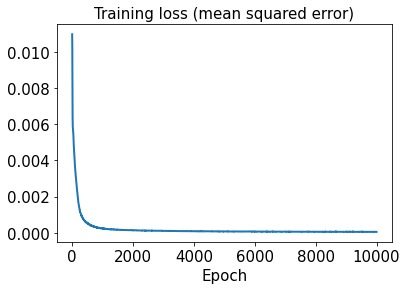

In [27]:
hist = history.history
plt.plot(hist['loss'], lw=2)
plt.title('Training loss (mean squared error)', size=15)
plt.xlabel('Epoch', size=15)
plt.tick_params(axis='both', which='major', labelsize=15)
plt.show()

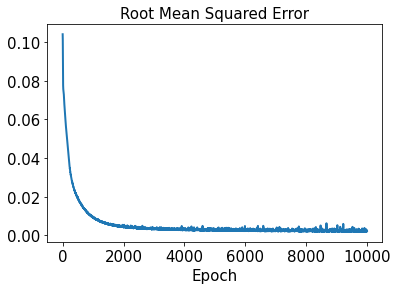

In [28]:
plt.plot(hist['rmse'], lw=2)
plt.title('Root Mean Squared Error', size=15)
plt.xlabel('Epoch', size=15)
plt.tick_params(axis='both', which='major', labelsize=15)
plt.show()

In [29]:
test_results = sd.evaluate(x_train)

13/13 [==============================] - 0s 2ms/step - loss: 4.0471e-05 - rmse: 0.0000e+00


In [30]:
decoded_train = sd.predict(x_train)

In [31]:
decoded_test = sd.predict(x_test)

In [32]:
error_train_abs = np.abs(decoded_train - y_train)

In [33]:
error_test_abs = np.abs(decoded_test - y_test)

In [34]:
l2_error_train = np.sum((decoded_train - y_train)**2) / np.sum(y_train**2)
print(l2_error_train)

0.0005246514


In [35]:
l2_error_test = np.sum((decoded_test - y_test)**2) / np.sum(y_test**2)
print(l2_error_test)

0.057589684


In [36]:
l2_error_train_list = []
for i in range(0, len(x_train)):
    l2_error_train_data = np.sum((decoded_train[i] - y_train[i])**2) / np.sum(y_train[i]**2)
    l2_error_train_list.append(l2_error_train_data)
#print(l2_error_train_list)

In [37]:
l2_error_test_list = []
for i in range(0, len(x_test)):
    l2_error_test_data = np.sum((decoded_test[i] - y_test[i])**2) / np.sum(y_test[i]**2)
    l2_error_test_list.append(l2_error_test_data)
print(l2_error_test_list)

[0.0082179345, 0.059265606, 0.0010866775, 0.0013774381, 0.0018236571, 0.02687821, 0.04230577, 0.002925337, 0.00086331466, 0.003652751, 0.13109982, 0.8020333, 0.0006078918, 0.014705855, 0.0012389175, 1.0619646, 0.0011893482, 0.0029413633, 0.014869614, 0.0011242445, 0.00063736306, 0.0012420492, 0.00068617595, 0.0011410243, 0.005897541, 0.0010563554, 0.041426044, 0.07713938, 0.0018121602, 0.0048568384, 0.0027120963, 0.07287875, 0.010142446, 0.0020129494, 0.0012179137, 0.051843617, 0.00090525456, 0.018772835, 0.005485681, 0.006886942, 0.022672383, 0.0016117839, 0.0008713928, 0.018767046]


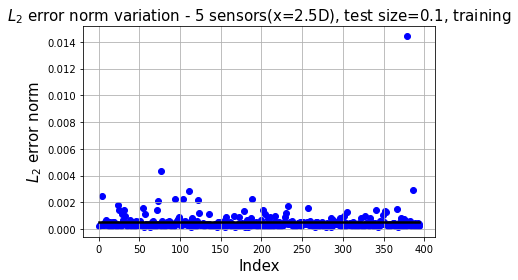

In [38]:
plt.plot(np.linspace(1, x_train.shape[0], x_train.shape[0]), l2_error_train*np.ones(x_train.shape[0],), 'k',
        lw=2.5)
plt.scatter(np.linspace(1, x_train.shape[0], x_train.shape[0]), l2_error_train_list, c='b')
plt.xlabel('Index', fontsize=15)
plt.ylabel('$L_2$ error norm', fontsize=15)
plt.title('$L_2$ error norm variation - 5 sensors(x=2.5D), test size=0.1, training', fontsize=15)
plt.grid()
plt.tight_layout()
plt.show()

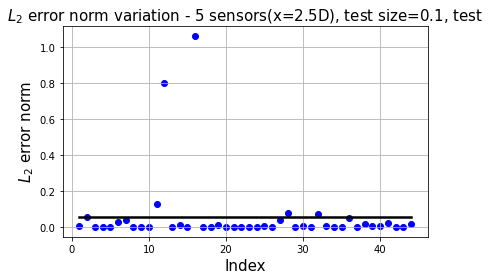

In [39]:
plt.plot(np.linspace(1, x_test.shape[0], x_test.shape[0]), l2_error_test*np.ones(x_test.shape[0],), 'k',
        lw=2.5)
plt.scatter(np.linspace(1, x_test.shape[0], x_test.shape[0]), l2_error_test_list, c='b')
plt.xlabel('Index', fontsize=15)
plt.ylabel('$L_2$ error norm', fontsize=15)
plt.title('$L_2$ error norm variation - 5 sensors(x=2.5D), test size=0.1, test', fontsize = 15)
plt.grid()
plt.tight_layout()
plt.show()

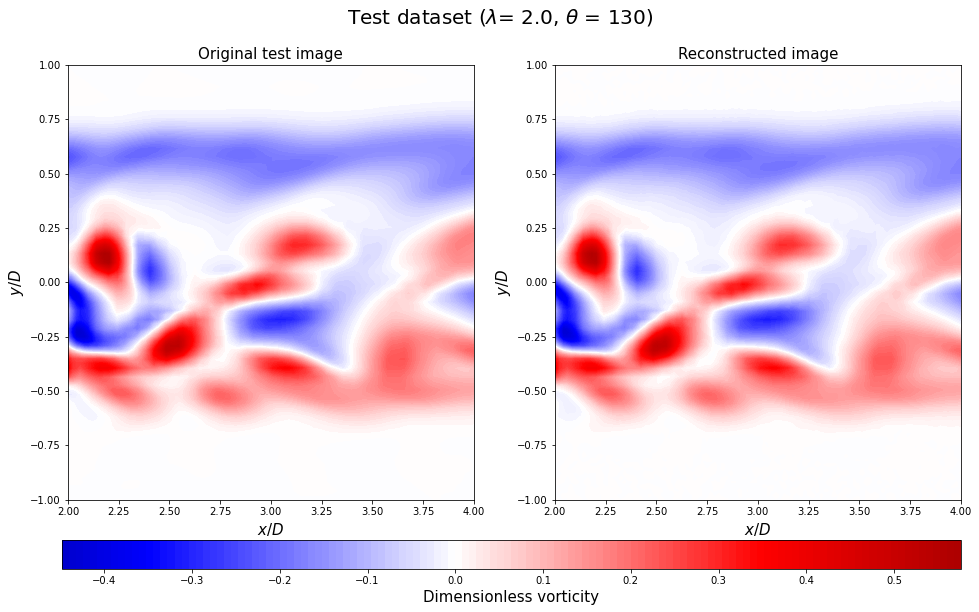

In [40]:
plt.figure(figsize=(16, 8))
y_test3_rotate = y_test[3].T.reshape(100, 100)
decoded_rotate = decoded_test[3].T.reshape(100, 100)

xrange = np.linspace(2, 4, 100)
yrange = np.linspace(-1, 1, 100)
xmesh, ymesh = np.meshgrid(xrange, yrange)

ax = plt.subplot(1, 2, 1)
#plt.contourf(xtest_rotate2, vmin=3, vmax=10, levels=11, cmap=parula_map)
#plt.contourf(xtest_rotate2, levels=11, cmap=parula_map)
a1 = plt.contourf(xmesh, ymesh, y_test3_rotate, levels=128, cmap='seismic')
ax.set_xlabel('$x/D$', fontsize=15)
ax.set_ylabel('$y/D$', fontsize=15)
#ax.get_xaxis().set_visible(False)
#ax.get_yaxis().set_visible(False)
ax.set_title('Original test image', fontsize=15)

# Display reconstruction
ax = plt.subplot(1, 2, 2)
#plt.contourf(decoded_rotate2, vmin=3, vmax=10, levels=11, cmap=parula_map)
#plt.contourf(decoded_rotate2, levels=11, cmap=parula_map)
a2 = plt.contourf(xmesh, ymesh, decoded_rotate, levels=128, cmap='seismic')
ax.set_xlabel('$x/D$', fontsize=15)
ax.set_ylabel('$y/D$', fontsize=15)
#ax.get_xaxis().set_visible(False)
#ax.get_yaxis().set_visible(False)
ax.set_title('Reconstructed image', fontsize=15)
a1.set_clim(-0.7,0.7)
a2.set_clim(-0.7,0.7)
cax = plt.axes([0.12, 0.005, 0.78, 0.05])
cbar = plt.colorbar(a1, cax=cax, orientation="horizontal")
cbar.set_label('Dimensionless vorticity', fontsize=15)
cbar.set_ticks([-0.5, -0.4, -0.3, -0.2, -0.1, 0, 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9])

plt.suptitle(r'Test dataset ($\lambda$= %.1f, $\theta$ = %d)' %(tsr_test[3], theta_test[3]),fontsize=20)
plt.show()

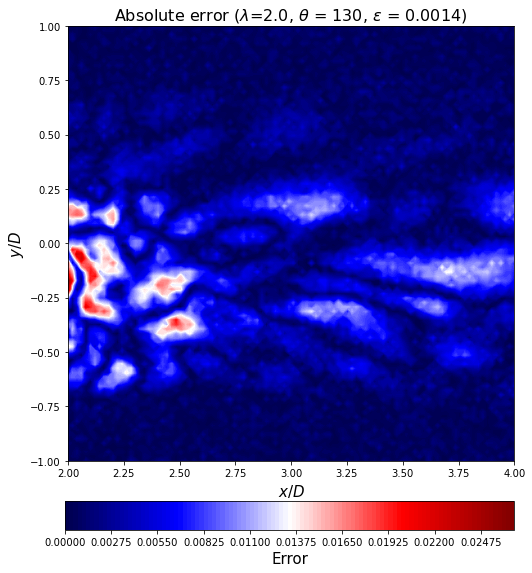

In [41]:
error_test_abs3_rotate = error_test_abs[3].T.reshape(100, 100)

fig5 = plt.figure(figsize = (8, 8))
ax5 = fig5.add_subplot(111)
mappable = ax5.contourf(xmesh, ymesh, error_test_abs3_rotate, levels=128, cmap='seismic')
ax5.set_title(r'Absolute error ($\lambda$=%.1f, $\theta$ = %d, $\epsilon$ = %.4f)' %(tsr_test[3],theta_test[3], l2_error_test_list[3]), fontsize=16)
ax5.set_xlabel('$x/D$', fontsize=15)
ax5.set_ylabel('$y/D$', fontsize=15)

cax = plt.axes([0.12, 0.005, 0.78, 0.05])
cbar = plt.colorbar(mappable, cax=cax, orientation="horizontal")
cbar.set_label('Error', fontsize=15)

plt.show()